# CIFAR 100 dataset - Image identification 

## Submitted by: Group 7

Source:  http://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR datasets are labeled subsets of the 80 million tiny images dataset
collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The images are of size 32x32 pixels with 3 color channels (RGB).It comprises of 100 classes containing 600 images each (500 training and 100 testing).

The classes (fine labels) are grouped into 20 superclasses (coarse labels) and corresponding classes. Group 7 has chosen the below subset of the data.

## Task 1: Select Superclass pairs

Below is the chosen pair of Superclasses.

### medium-sized mammals -
fox, porcupine, possum, raccoon, skunk

### small mammals -
hamster, mouse, rabbit, shrew, squirrel


In [1]:
# Install keras and dill
!pip install dill
!pip install -q keras
!pip install keras --upgrade

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [2]:
# Import packages and modules
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
# Set tensorflow in the backend
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [4]:
# Smaller batch size means more updates in one epoch
batch_size = 256
num_classes = 2
'''
epochs_longrun = 500
save_dir = "/work"
res_dir = "/results"
model_name = 'convnet_cifar100'
'''

'\nepochs_longrun = 500\nsave_dir = "/work"\nres_dir = "/results"\nmodel_name = \'convnet_cifar100\'\n'

In [5]:
# Load data and set a seed for reproducibility of results
tf.reset_default_graph()
tf.set_random_seed(343)
np.random.seed(343)
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data() 
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169009152/169001437 [==============================] - 21s 0us/step
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [6]:
# Check the unique values in training set
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
# Check the unique values in test set
np.unique(x_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
# Check the unique values in training set
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
# Check the unique values in test set
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Task 2: Combine the training and test data back into one data

In [10]:
# Use concatenate function to merge the two sets
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))  # for ten class

print('x shape:', x.shape)
print('multiple y shape:', y.shape)

x shape: (60000, 3, 32, 32)
multiple y shape: (60000, 1)


In [11]:
# Check the unique values in training set / target is hundred classes

unique, counts = np.unique(y, return_counts=True)  #Numpyway to count the number of time a certain number occurs
unique
#dict(zip(unique, counts)) #builds a dictionary that shows that count

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
# Convert class vectors to binary class matrices.
#y_train_c = to_categorical(y_train, num_classes)
#y_test_c = to_categorical(y_test, num_classes)

#Normalize data
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255.0    
#x_test /= 255.0

## Task 3: Filter out the assigned superclasses

In [13]:
# First and foremost, define fine labels
fine_label = [
'apple',                                         # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

# For the above fine labels, find the index of relevant sub-classes
medium_sized_mammals_index = [ fine_label.index(x) for x in ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'] ]
small_mammals_index = [ fine_label.index(x) for x in ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'] ]
target_index = medium_sized_mammals_index + small_mammals_index

print ("Index of Medium-sized mammals:", medium_sized_mammals_index,"\nIndex of Small mammals:", small_mammals_index)

Index of Medium-sized mammals: [34, 63, 64, 66, 75] 
Index of Small mammals: [36, 50, 65, 74, 80]


In [14]:
# For training set
medium_index2 = [ fine_label.index(x) for x in ['porcupine', 'possum', 'raccoon', 'skunk'] ]
small_index2 = [ fine_label.index(x) for x in ['hamster', 'mouse', 'rabbit', 'shrew'] ]
target_index2 = medium_index2 + small_index2

print ("Training set-\nNew index of Medium-sized mammals:", medium_index2,"\nNew index of Small mammals:", small_index2)

# For testing data - 
medium_index_2 = [ fine_label.index(x) for x in ['fox'] ]
small_index_2 = [ fine_label.index(x) for x in ['squirrel'] ]
target_index_2 = medium_index_2 + small_index_2

print ("\nTesting set-\nNew index of Medium-sized mammals:", medium_index_2,"\nNew index of Small mammals:", small_index_2)

Training set-
New index of Medium-sized mammals: [63, 64, 66, 75] 
New index of Small mammals: [36, 50, 65, 74]

Testing set-
New index of Medium-sized mammals: [34] 
New index of Small mammals: [80]


In [15]:
# Splice the dataset to extract the relevant portion of data
train_slice2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index2])
y_train2 = y[train_slice2]
x_train2 = x[train_slice2]

# Test set
test_slice2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index_2])
y_test2 = y[test_slice2]
x_test2 = x[test_slice2]

print ("Training set:", np.unique(y_train2))
print ("Testing set:", np.unique(y_test2))


print('\ny_train2 shape:', y_train2.shape)
print('y_test2 shape:', y_test2.shape)

unique, counts = np.unique(y_test2, return_counts=True)  #Numpyway to count the number of time a certain number occurs
dict(zip(unique, counts)) #builds a dictionary that shows that count


Training set: [36 50 63 64 65 66 74 75]
Testing set: [34 80]

y_train2 shape: (4800, 1)
y_test2 shape: (1200, 1)


{34: 600, 80: 600}

In [0]:
#Normalize data
x_train = x_train2.astype('float32')
x_test = x_test2.astype('float32')
x_train /= 255.0    
x_test /= 255.0

In [17]:
#  Binary as we are working with two superclasses labels (or coarse labels)
y_train_bin = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_train2 ])
y_test_bin = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_test2 ])

print('binary y train shape:', y_train_bin.shape)
print('binary y test shape:', y_test_bin.shape)

print('')
unique, counts = np.unique(y_train_bin, return_counts=True)  #Numpyway to count the number of time a certain number occurs
unique
dict(zip(unique, counts)) #builds a dictionary that shows that count


binary y train shape: (4800, 1)
binary y test shape: (1200, 1)



{0: 2400, 1: 2400}

## Visualize and validate the data 

In [0]:
# Assign a binary class
y_class=[[0] if i in [34,63,64,66,75] else [1] for i in y]

# Slice for individual classes
slice1=np.array([ idx for idx, y in enumerate(y) if y[0] in [34]])
slice2=np.array([ idx for idx, y in enumerate(y) if y[0] in [63]])
slice3=np.array([ idx for idx, y in enumerate(y) if y[0] in [64]])
slice4=np.array([ idx for idx, y in enumerate(y) if y[0] in [66]])
slice5=np.array([ idx for idx, y in enumerate(y) if y[0] in [75]])
slice6=np.array([ idx for idx, y in enumerate(y) if y[0] in [36]])
slice7=np.array([ idx for idx, y in enumerate(y) if y[0] in [50]])
slice8=np.array([ idx for idx, y in enumerate(y) if y[0] in [65]])
slice9=np.array([ idx for idx, y in enumerate(y) if y[0] in [74]])
slice10=np.array([ idx for idx, y in enumerate(y) if y[0] in [80]])

x1 =x[slice1]; y1=y[slice1]
x2 =x[slice2]; y2=y[slice2]
x3 =x[slice3]; y3=y[slice3]
x4 =x[slice4]; y4=y[slice4]
x5 =x[slice5]; y5=y[slice5]
x6 =x[slice6]; y6=y[slice6]
x7 =x[slice7]; y7=y[slice7]
x8 =x[slice8]; y8=y[slice8]
x9 =x[slice9]; y9=y[slice9]
x10 =x[slice10]; y10=y[slice10]

In [0]:
# Define function for visualization
def cifar_grid(X,Y,index1,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(10, 10))
  
# align labels in the right order, i.e., from 0 to 9
  clabels = {34: 'Fox', 63: 'Porcupine', 64: 'Possum', 66: 'Raccoon', 75: 'Skunk', 36: 'Hamster', 50: 'Mouse', 65: 'Rabbit', 74: 'Shrew', 80: 'Squirrel'}
  y_class_name=["Medium-sized mammal" if i in [34,63,64,66,75] else "Small mammal" for i in Y]
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1, xticks=[], yticks=[])
        plt.imshow(img)
        plt.title("{}\n- {}".format(y_class_name[index1],label))
       
         
  fig.set_tight_layout(True)

[483, 551, 421, 439]
<class 'dict'>
[61, 501, 5, 140]
<class 'dict'>
[12, 1, 423, 565]
<class 'dict'>
[13, 156, 556, 252]
<class 'dict'>
[533, 429, 500, 505]
<class 'dict'>
[113, 179, 104, 571]
<class 'dict'>
[156, 256, 139, 95]
<class 'dict'>
[85, 484, 205, 419]
<class 'dict'>
[497, 433, 458, 564]
<class 'dict'>
[250, 399, 281, 322]
<class 'dict'>


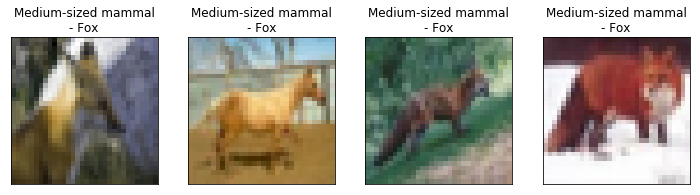

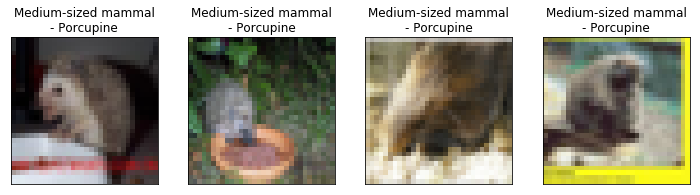

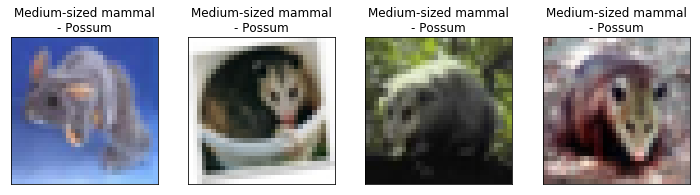

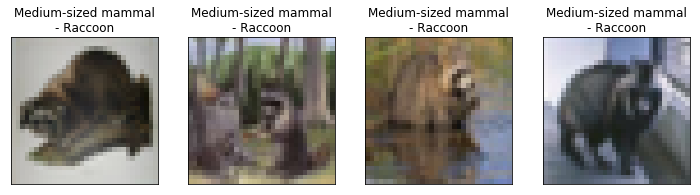

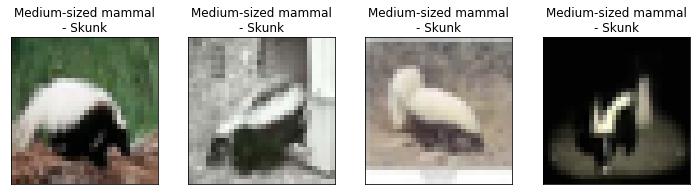

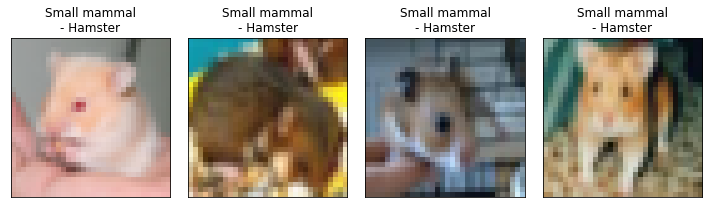

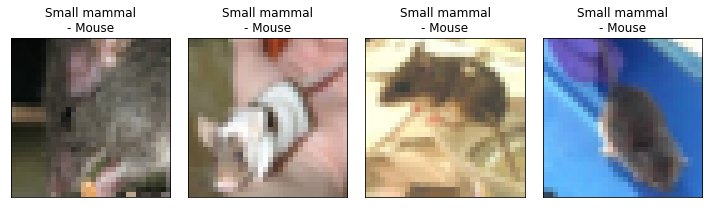

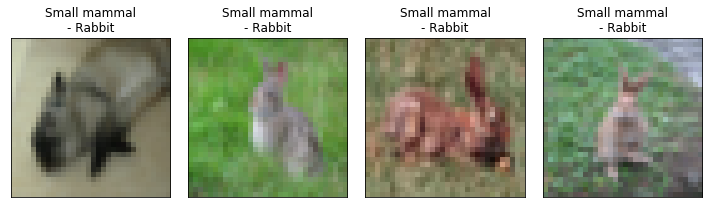

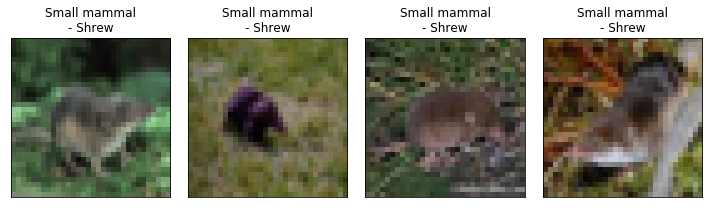

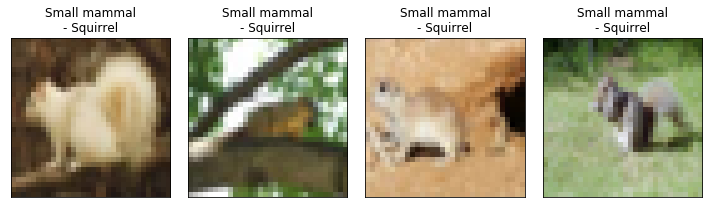

In [0]:
# Use the above function to plot 4 random images from each sub-class
indices = [np.random.choice(range(len(x1)),replace=False) for i in range(4)]; print (indices); cifar_grid(x1,y1,34,indices,4)
indices = [np.random.choice(range(len(x2)),replace=False) for i in range(4)]; print (indices); cifar_grid(x2,y2,63,indices,4)
indices = [np.random.choice(range(len(x3)),replace=False) for i in range(4)]; print (indices); cifar_grid(x3,y3,64,indices,4)
indices = [np.random.choice(range(len(x4)),replace=False) for i in range(4)]; print (indices); cifar_grid(x4,y4,66,indices,4)
indices = [np.random.choice(range(len(x5)),replace=False) for i in range(4)]; print (indices); cifar_grid(x5,y5,75,indices,4)
indices = [np.random.choice(range(len(x6)),replace=False) for i in range(4)]; print (indices); cifar_grid(x6,y6,36,indices,4)
indices = [np.random.choice(range(len(x7)),replace=False) for i in range(4)]; print (indices); cifar_grid(x7,y7,50,indices,4)
indices = [np.random.choice(range(len(x8)),replace=False) for i in range(4)]; print (indices); cifar_grid(x8,y8,65,indices,4)
indices = [np.random.choice(range(len(x9)),replace=False) for i in range(4)]; print (indices); cifar_grid(x9,y9,74,indices,4)
indices = [np.random.choice(range(len(x10)),replace=False) for i in range(4)]; print (indices); cifar_grid(x10,y10,80,indices,4)

In [0]:
def cifar_grid1(X,Y,inds,n_col,predictions,test_list):  #print out randomly selected images and their labels  
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(15, 20))
  #count=0
  #l=list()
# align labels in the right order  #encode the target class
  clabels = ['small_mammals','medium_sized_mammal']
  #print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
     
      if i_inds < N:
        rgb = X[[i_data,...]]
        test_label=test_list[0] if clabels[Y[i_data][0]]=='small_mammals' else test_list[1]  
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        #pred = clabels[np.argmax(predictions[i_data,...])]
        pred = clabels[predictions[i_data]]
        plt.imshow(img, interpolation='nearest')
        plt.title("actual: {}({})\n predict: {}".format(label,test_label,pred))  
        #if label==pred:
        #  count+=1
        #  l.append(j*4+k)
  #print(count)
  #print(l)
         
  fig.set_tight_layout(True)

In [0]:
def cifar_grid2(X,Y,inds,n_col,predictions):  #print out randomly selected images and their labels  
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(15, 20))
  #count=0
  #l=list()
# align labels in the right order  #encode the target class
  clabels = ['small_mammals','medium_sized_mammal']
  #print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
     
      if i_inds < N:
        rgb = X[[i_data,...]]
        #test_label=test_list[0] if clabels[Y[i_data][0]]=='small_mammals' else test_list[1]  
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        #pred = clabels[np.argmax(predictions[i_data,...])]
        pred = clabels[predictions[i_data]]
        plt.imshow(img, interpolation='nearest')
        plt.title("actual: {}\n predict: {}".format(label,pred))  
        #if label==pred:
        #  count+=1
        #  l.append(j*4+k)
  #print(count)
  #print(l)
         
  fig.set_tight_layout(True)

In [0]:
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']

In [0]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [0]:
import warnings 
warnings.filterwarnings('ignore') 

# **Prediction on randomly selected testing images**

## **split data**

In [0]:
medium_index2 = [ fine_label.index(x) for x in ['fox','porcupine', 'possum', 'raccoon', 'skunk'] ]
small_index2 = [ fine_label.index(x) for x in ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'] ]
target_index2 = medium_index2 + small_index2

print ("Data set-\nNew index of Medium-sized mammals:", medium_index2,"\nNew index of Small mammals:", small_index2)


Data set-
New index of Medium-sized mammals: [34, 63, 64, 66, 75] 
New index of Small mammals: [36, 50, 65, 74, 80]


In [0]:
# Splice the dataset to extract the relevant portion of data
slice2 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_index2])
y_slice = y[slice2]
x_slice = x[slice2]

unique, counts = np.unique(y_slice ,return_counts=True)  #Numpyway to count the number of time a certain number occurs
dict(zip(unique, counts)) #builds a dictionary that shows that count


{34: 600,
 36: 600,
 50: 600,
 63: 600,
 64: 600,
 65: 600,
 66: 600,
 74: 600,
 75: 600,
 80: 600}

In [0]:
#Normalize data
x_slice2 = x_slice.astype('float32')
x_slice2 /= 255.0   

In [0]:
#  Binary as we are working with two superclasses labels (or coarse labels)
y_slice_bin = np.array([[int(y[0] in medium_sized_mammals_index)] for y in y_slice ])

print('binary y train shape:', y_slice_bin.shape)

print('')
unique, counts = np.unique(y_slice_bin, return_counts=True)  #Numpyway to count the number of time a certain number occurs
unique
dict(zip(unique, counts)) #builds a dictionary that shows that count


binary y train shape: (6000, 1)



{0: 3000, 1: 3000}

In [0]:
x_train_1, x_test_1, y_train_bin_1, y_test_bin_1 = train_test_split(x_slice, y_slice_bin, test_size=0.2)

In [0]:
x_train_1 = x_train_1.reshape(x_train_1.shape[0],3*32*32)
x_test_1 = x_test_1.reshape(x_test_1.shape[0],3*32*32)


## **KNN**

In [0]:
start = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train_1, y_train_bin_1)
knn_pred=knn.predict(x_test_1)
print ("Accuracy: {}%".format(knn.score(x_test_1, y_test_bin_1)*100)) 
end = time.time()
print('{} seconds'.format(end-start))

Accuracy: 58.25%
86.89371299743652 seconds


In [0]:
indices = [np.random.choice(range(len(x_test_1))) for i in range(36)]

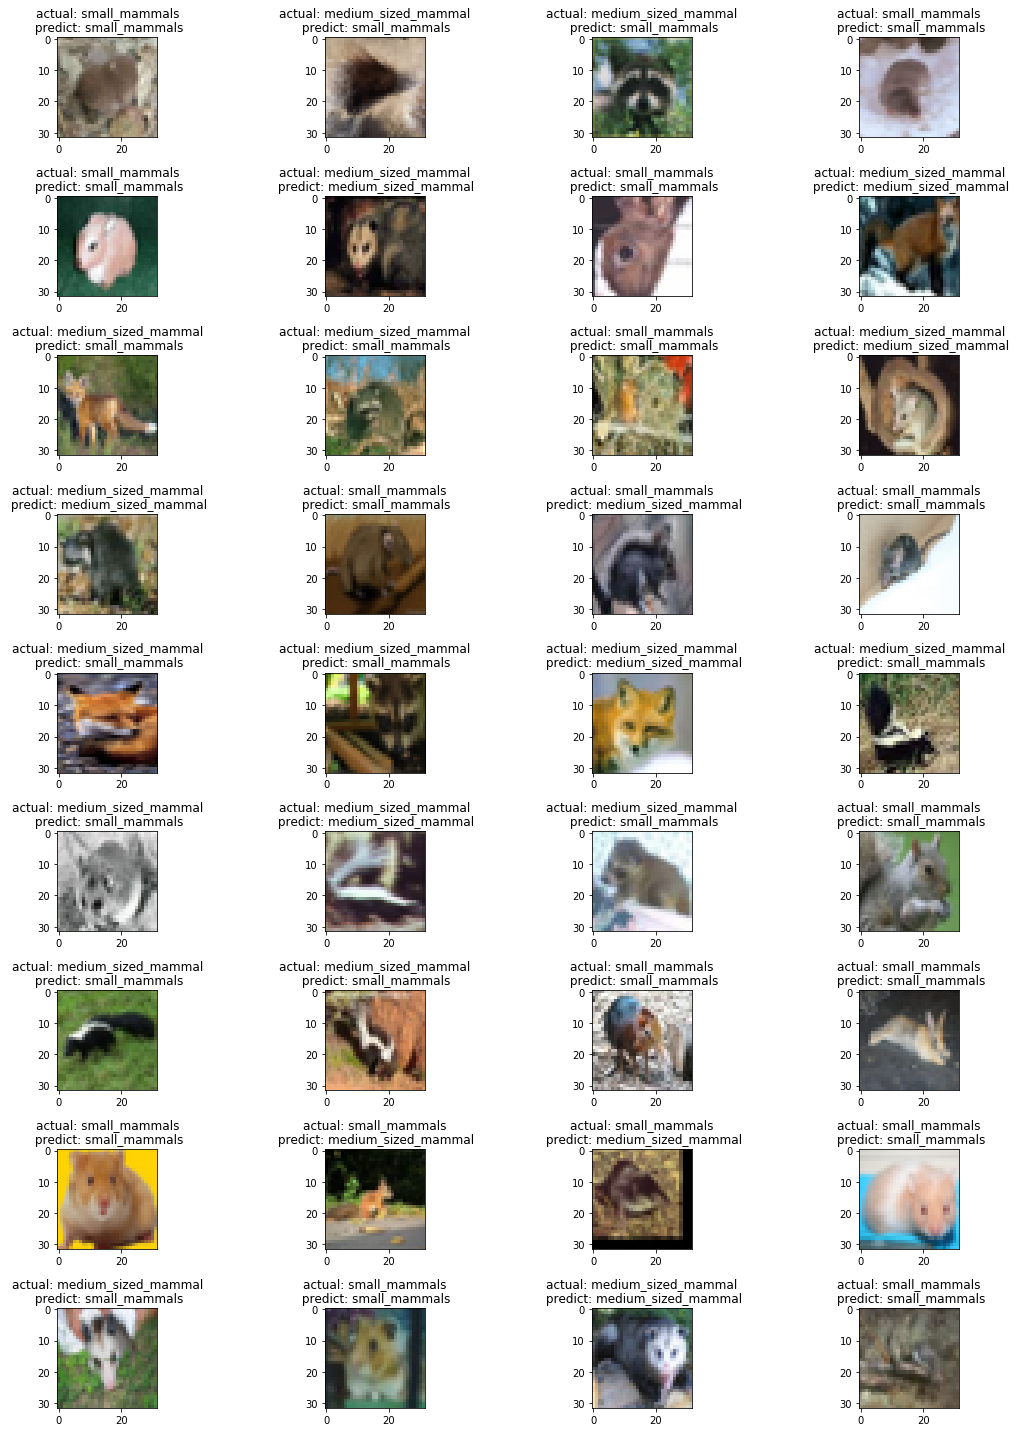

In [0]:
cifar_grid2(x_test_1,y_test_bin_1,indices,4,knn_pred)

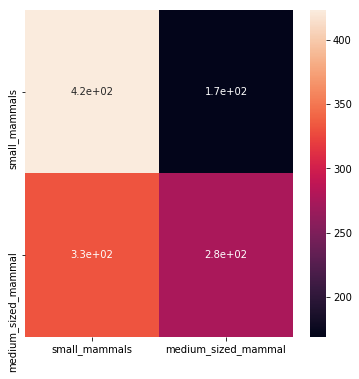

In [0]:
cm=confusion_matrix(y_test_bin_1, knn_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin_1, knn_pred,target_names=['small_mammals','medium_sized_mammal']))

                     precision    recall  f1-score   support

      small_mammals       0.56      0.71      0.63       592
medium_sized_mammal       0.62      0.45      0.52       608

          micro avg       0.58      0.58      0.58      1200
          macro avg       0.59      0.58      0.58      1200
       weighted avg       0.59      0.58      0.58      1200



## **Bagging**

In [0]:
start = time.time()
bag = BaggingClassifier()
bag.fit(x_train_1, y_train_bin_1)
bag_pred=bag.predict(x_test_1)
print ("Accuracy: {}%".format(bag.score(x_test_1, y_test_bin_1)*100)) 
end = time.time()
print('{} seconds'.format(end - start))

Accuracy: 61.583333333333336%
112.20259237289429 seconds


In [0]:
indices = [np.random.choice(range(len(x_test_1))) for i in range(36)]

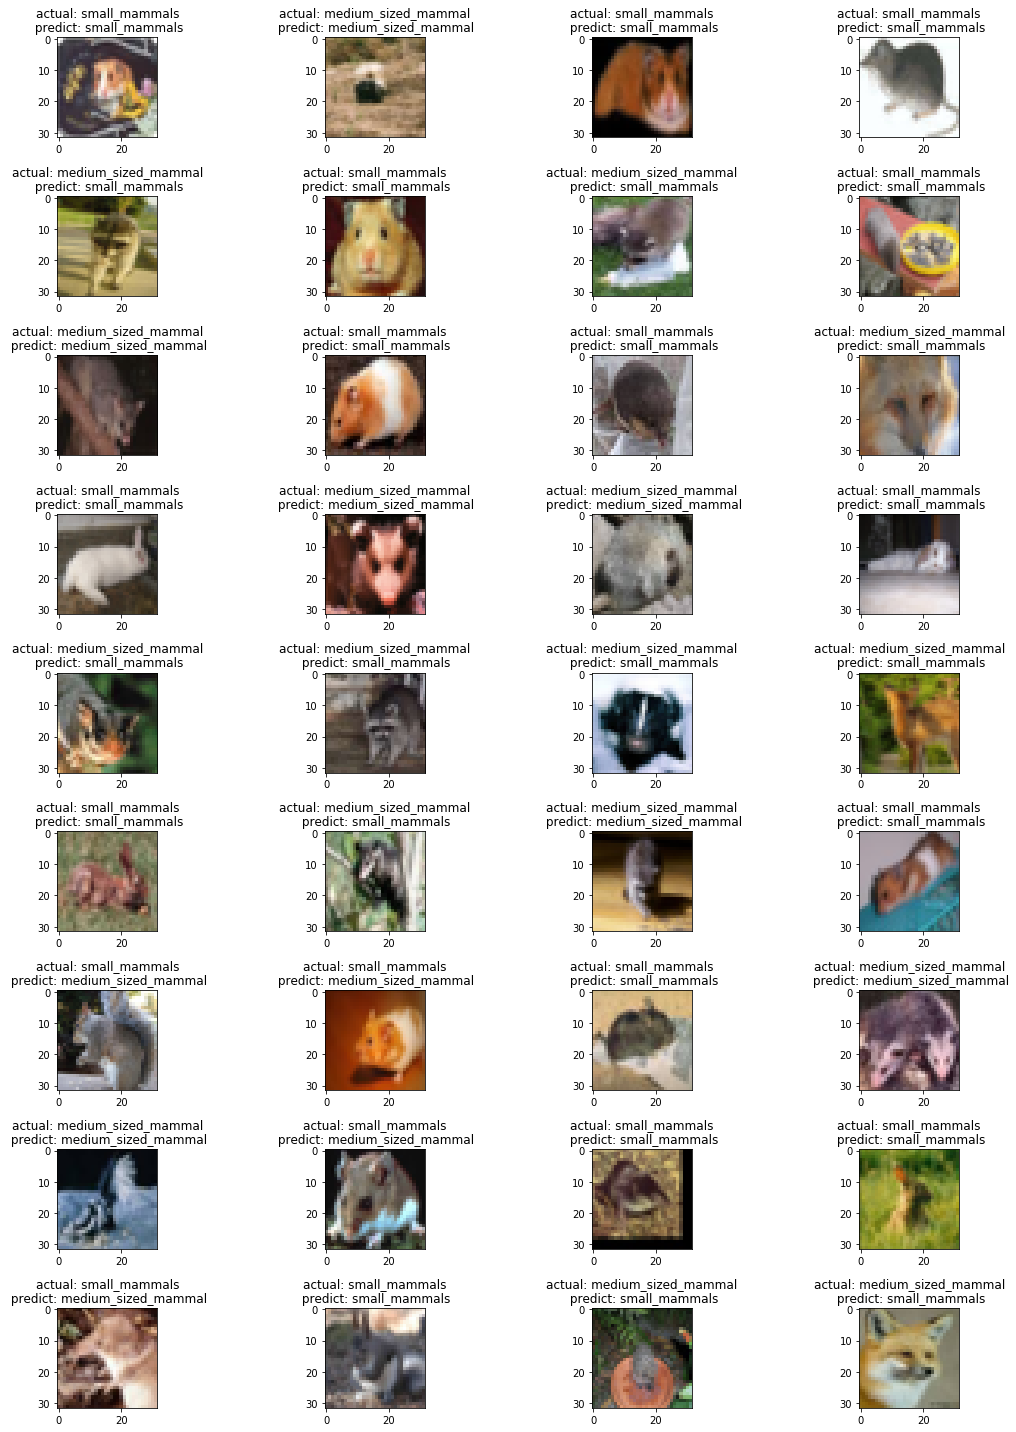

In [0]:
cifar_grid2(x_test_1,y_test_bin_1,indices,4,bag_pred)

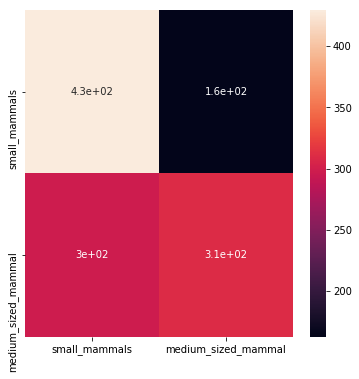

In [0]:
cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_test_bin_1, bag_pred,target_names=['small_mammals','medium_sized_mammal']))

                     precision    recall  f1-score   support

      small_mammals       0.59      0.72      0.65       592
medium_sized_mammal       0.66      0.51      0.57       608

          micro avg       0.62      0.62      0.62      1200
          macro avg       0.62      0.62      0.61      1200
       weighted avg       0.62      0.62      0.61      1200



# **Prediction on one testing subclass images from each of the two superclasses**

## sub-classes for training/testing for each combinations

In [0]:
def train_test(small,medium): # test class for small and med
  small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
  small_mammals.remove(small)
  medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
  medium_sized_mammals.remove(medium)
  
  # For training set
  medium_ind = [ fine_label.index(x) for x in medium_sized_mammals ]
  small_ind = [ fine_label.index(x) for x in small_mammals ]
  target_ind = medium_ind + small_ind

  #print ("Training set-\nNew index of Medium-sized mammals:", medium_ind,"\nNew index of Small mammals:", small_ind)

  # For testing data - 
  medium_ind_2 = [ fine_label.index(x) for x in [medium] ]
  small_ind_2 = [ fine_label.index(x) for x in [small] ]
  target_ind_2 = medium_ind_2 + small_ind_2
  #print ("\nTesting set-\nNew index of Medium-sized mammals:", medium_ind_2,"\nNew index of Small mammals:", small_ind_2)
  
  # Splice the dataset to extract the relevant portion of data
  train_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind])
  y_train3 = y[train_slice3]
  x_train3 = x[train_slice3]

  # Test set
  test_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind_2])
  y_test3 = y[test_slice3]
  x_test3 = x[test_slice3]

  #print ("Training set:", np.unique(y_train3))
  #print ("\nTesting set:", np.unique(y_test3))
  #  Binary as we are working with two superclasses labels (or coarse labels)
  y_train_bin3 = np.array([[int(y[0] in medium_ind)] for y in y_train3])
  y_test_bin3 = np.array([[int(y[0] in medium_ind_2)] for y in y_test3])
  y_bin3 = np.concatenate((y_train_bin3,y_test_bin3)) # for two superclass
  
  return x_train3,x_test3,y_train_bin3,y_test_bin3

In [0]:
# create list for train and test
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
x_train3=list()
x_test3=list()
y_train_bin3=list()
y_test_bin3=list()
test_list=list()  
for i in range(0,5):
  for j in range(0,5):
    small=small_mammals[i]
    medium=medium_sized_mammals[j]
    x_train_temp,x_test_temp,y_train_temp,y_test_temp=train_test(small,medium)
    x_train3.append(x_train_temp)
    x_test3.append(x_test_temp)
    y_train_bin3.append(y_train_temp)
    y_test_bin3.append(y_test_temp)
    test_list.append([small,medium])  


In [27]:
x_train3_ = [x_train3[i].reshape(x_train3[i].shape[0],3*32*32) for i in range(0,25)]
x_test3_ = [x_test3[i].reshape(x_test3[i].shape[0],3*32*32) for i in range(0,25)]
len(x_train3_)

25

In [0]:
"""x_train2 = x_train2.reshape(x_train2.shape[0],3*32*32)
x_test2 = x_test2.reshape(x_test2.shape[0],3*32*32) """

'x_train2 = x_train2.reshape(x_train2.shape[0],3*32*32)\nx_test2 = x_test2.reshape(x_test2.shape[0],3*32*32) '

In [0]:
"""#create the testdata without squirrel and fox 
test_minus_target_class_slice = np.array([ idx for idx, y in enumerate(y_test) if y[0] in target_index2])
y_test_minus_target_class = y_test[test_minus_target_class_slice]
y_test_bin_minus_target_class = np.array([[int(y[0] in medium_index2)] for y in y_test_minus_target_class])
x_test_minus_target_class = x_test[test_minus_target_class_slice]
x_test_minus_target_class=x_test_minus_target_class.reshape(x_test_minus_target_class.shape[0],3*32*32)"""

'#create the testdata without squirrel and fox \ntest_minus_target_class_slice = np.array([ idx for idx, y in enumerate(y_test) if y[0] in target_index2])\ny_test_minus_target_class = y_test[test_minus_target_class_slice]\ny_test_bin_minus_target_class = np.array([[int(y[0] in medium_index2)] for y in y_test_minus_target_class])\nx_test_minus_target_class = x_test[test_minus_target_class_slice]\nx_test_minus_target_class=x_test_minus_target_class.reshape(x_test_minus_target_class.shape[0],3*32*32)'

## **KNN**

In [0]:
# select: hamster & fox
start = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train3_[0], y_train_bin3[0])
knn_pred=knn.predict(x_test3_[0])
print ("Accuracy ({}, {}): {}%".format(test_list[0][0],test_list[0][1] ,knn.score(x_test3_[0], y_test_bin3[0])*100)) 
end = time.time()
print('{} seconds'.format(end - start))

Accuracy (hamster, fox): 54.41666666666667%
87.65227007865906 seconds


In [0]:
indices = [np.random.choice(range(len(x_test3_[0]))) for i in range(36)]

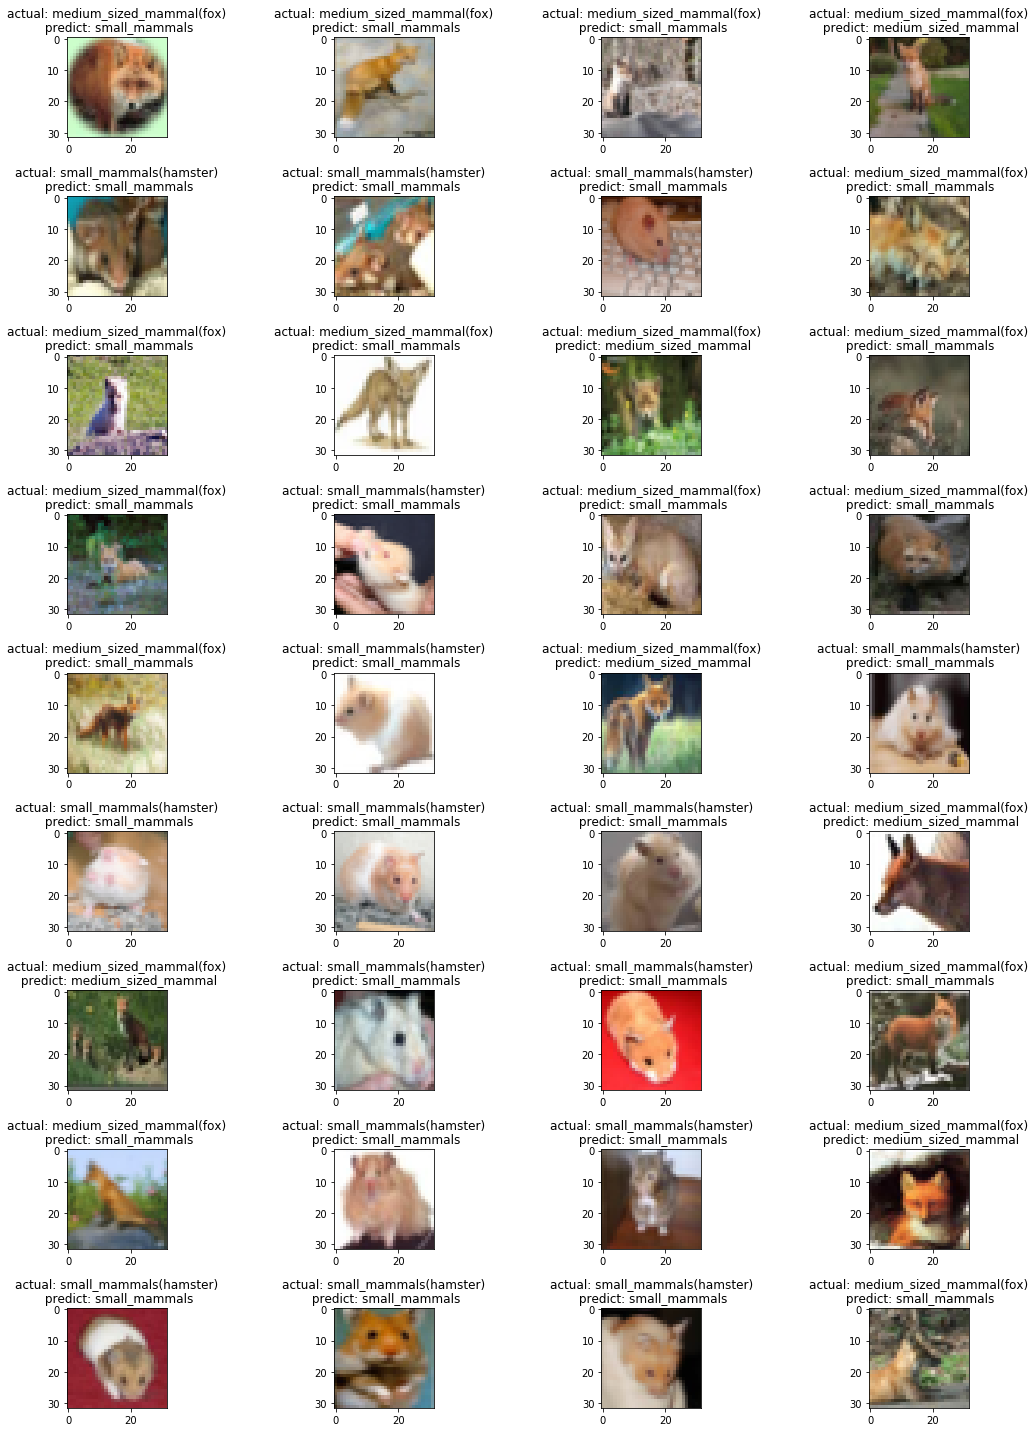

In [0]:
cifar_grid1(x_test3_[0],y_test_bin3[0],indices,4,knn_pred,['hamster','fox'])

In [0]:
# best peremeter
knn_accuracy=list()
knn_time=list()
print("KNN ") 
for i in range(0,25):
  start = time.time()
  knn1 = KNeighborsClassifier(n_neighbors=500, weights='distance')
  knn1.fit(x_train3_[i], y_train_bin3[i])
  knn1_pred=knn1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,knn1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  knn_accuracy.append(knn1.score(x_test3_[i], y_test_bin3[i]))
  knn_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(knn_accuracy)*100))
print("average time: {} seconds".format(np.mean(knn_time)))

KNN 
Accuracy (hamster, fox): 53.833333333333336%
88.08135962486267 seconds

Accuracy (hamster, porcupine): 56.08333333333333%
87.48508310317993 seconds

Accuracy (hamster, possum): 61.75000000000001%
87.75503253936768 seconds

Accuracy (hamster, raccoon): 54.333333333333336%
87.99688220024109 seconds

Accuracy (hamster, skunk): 52.666666666666664%
87.92742419242859 seconds

Accuracy (mouse, fox): 50.83333333333333%
88.212961435318 seconds

Accuracy (mouse, porcupine): 56.58333333333333%
87.72566485404968 seconds

Accuracy (mouse, possum): 60.66666666666667%
87.74069714546204 seconds

Accuracy (mouse, raccoon): 54.25%
87.79175114631653 seconds

Accuracy (mouse, skunk): 53.75%
87.74816989898682 seconds

Accuracy (rabbit, fox): 50.083333333333336%
88.1019995212555 seconds

Accuracy (rabbit, porcupine): 55.58333333333333%
87.37468194961548 seconds

Accuracy (rabbit, possum): 59.0%
87.9523777961731 seconds

Accuracy (rabbit, raccoon): 53.25%
87.63393139839172 seconds

Accuracy (rabbit, sku

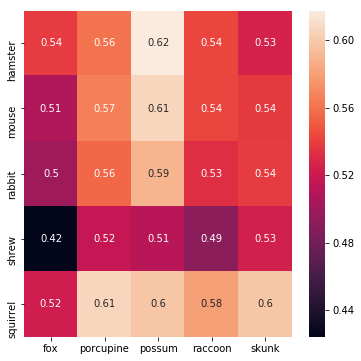

In [0]:
plt.figure(figsize = (6,6))
data=pd.DataFrame([knn_accuracy[0:5],knn_accuracy[5:10],knn_accuracy[10:15],knn_accuracy[15:20],knn_accuracy[20:]],
                  index = [i for i in small_mammals],
                  columns = [i for i in medium_sized_mammals])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(knn_accuracy).describe

,0
count,25.000000
mean,0.545667
std,0.044110
min,0.424167
25%,0.522500
50%,0.538333
75%,0.580000
max,0.617500


In [29]:
# default
knn_accuracy=list()
knn_time=list()
print("KNN ") 
for i in range(0,25):
  start = time.time()
  knn1 = KNeighborsClassifier()
  knn1.fit(x_train3_[i], y_train_bin3[i])
  #knn1_pred=knn1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,knn1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  knn_accuracy.append(knn1.score(x_test3_[i], y_test_bin3[i]))
  knn_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(knn_accuracy)*100))
print("average time: {} seconds".format(np.mean(knn_time)))

KNN 
Accuracy (hamster, fox): 54.41666666666667%
40.25801229476929 seconds

Accuracy (hamster, porcupine): 56.08333333333333%
39.907382011413574 seconds

Accuracy (hamster, possum): 57.08333333333333%
39.95363450050354 seconds

Accuracy (hamster, raccoon): 54.333333333333336%
39.94389057159424 seconds

Accuracy (hamster, skunk): 52.5%
40.450050592422485 seconds

Accuracy (mouse, fox): 49.833333333333336%
39.23607897758484 seconds

Accuracy (mouse, porcupine): 54.333333333333336%
39.18642449378967 seconds

Accuracy (mouse, possum): 56.00000000000001%
38.87725234031677 seconds

Accuracy (mouse, raccoon): 53.41666666666667%
39.340251445770264 seconds

Accuracy (mouse, skunk): 53.0%
38.92823886871338 seconds

Accuracy (rabbit, fox): 48.75%
39.26878213882446 seconds

Accuracy (rabbit, porcupine): 54.41666666666667%
38.701336145401 seconds

Accuracy (rabbit, possum): 55.666666666666664%
38.93571639060974 seconds

Accuracy (rabbit, raccoon): 52.916666666666664%
38.80074191093445 seconds

Accu

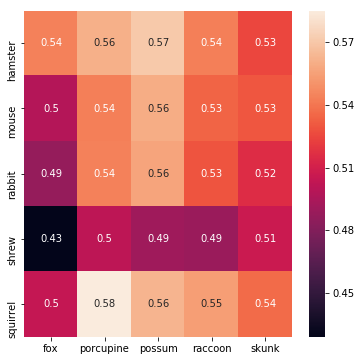

In [30]:
plt.figure(figsize = (6,6))
data=pd.DataFrame([knn_accuracy[0:5],knn_accuracy[5:10],knn_accuracy[10:15],knn_accuracy[15:20],knn_accuracy[20:]],
                  index = [i for i in small_mammals],
                  columns = [i for i in medium_sized_mammals])


ax=sns.heatmap(data, annot=True)

In [45]:
pd.DataFrame(knn_accuracy).describe()

,0
count,25.000000
mean,0.528133
std,0.034184
min,0.429167
25%,0.504167
50%,0.534167
75%,0.554167
max,0.585000


## **Bagging**

In [32]:
# select: hamsrer & fox
start = time.time()
bag = BaggingClassifier()
bag.fit(x_train3_[0], y_train_bin3[0])
bag_pred=bag.predict(x_test3_[0])
print ("Accuracy ({}, {}): {}%".format(test_list[0][0],test_list[0][1] ,bag.score(x_test3_[0], y_test_bin3[0])*100)) 
end = time.time()
print('{} seconds'.format(end - start))

Accuracy (hamster, fox): 53.666666666666664%
92.7651743888855 seconds


In [0]:
indices = [np.random.choice(range(len(x_test3_[0]))) for i in range(36)]

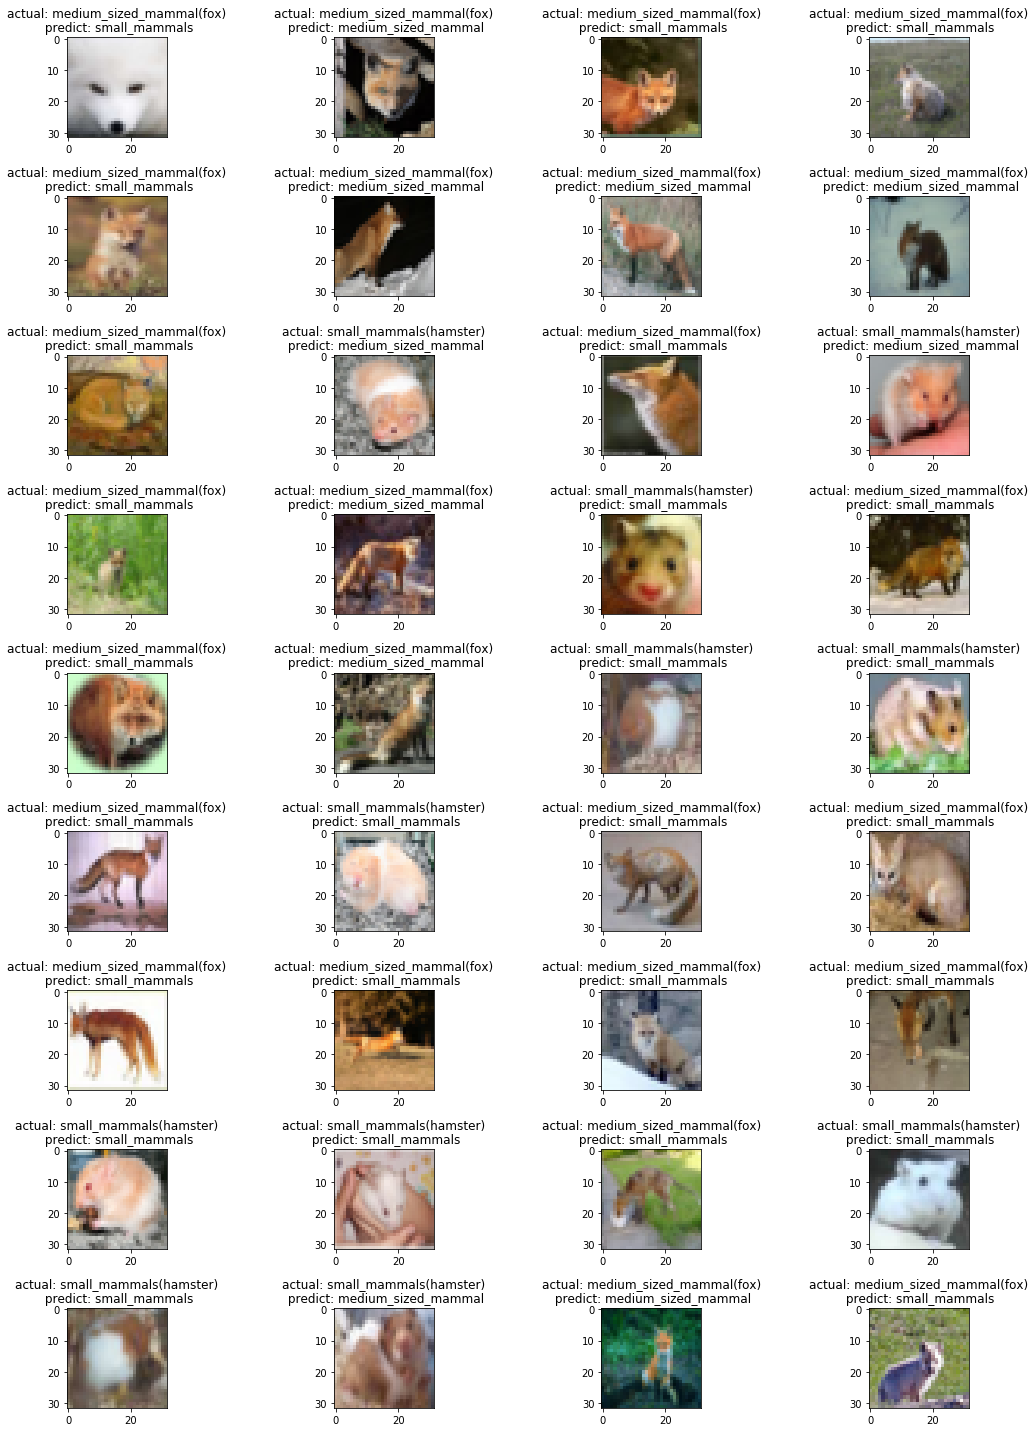

In [34]:
cifar_grid1(x_test3_[0],y_test_bin3[0],indices,4,bag_pred,['hamster','fox'])

In [0]:
# default
bag_accuracy=list()
bag_time=list()
print("Bagging ") 
for i in range(0,25):
  start = time.time()
  bag1 = BaggingClassifier()
  bag1.fit(x_train3_[i], y_train_bin3[i])
  bag1_pred=bag1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,bag1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  bag_accuracy.append(bag1.score(x_test3_[i], y_test_bin3[i]))
  bag_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(bag_accuracy)*100))
print("average time: {} seconds".format(np.mean(bag_time)))

Bagging 
Accuracy (hamster, fox): 54.25%
117.5977394580841 seconds
Accuracy (hamster, porcupine): 56.00000000000001%
116.69763159751892 seconds
Accuracy (hamster, possum): 55.75%
111.13960480690002 seconds
Accuracy (hamster, raccoon): 53.75%
116.13089966773987 seconds
Accuracy (hamster, skunk): 54.333333333333336%
108.19465351104736 seconds
Accuracy (mouse, fox): 50.916666666666664%
111.61680150032043 seconds
Accuracy (mouse, porcupine): 61.5%
107.30498003959656 seconds
Accuracy (mouse, possum): 56.91666666666667%
105.8773365020752 seconds
Accuracy (mouse, raccoon): 55.75%
110.51708889007568 seconds
Accuracy (mouse, skunk): 59.0%
105.53874659538269 seconds
Accuracy (rabbit, fox): 47.5%
106.70419692993164 seconds
Accuracy (rabbit, porcupine): 56.99999999999999%
114.08803677558899 seconds
Accuracy (rabbit, possum): 53.5%
110.45594716072083 seconds
Accuracy (rabbit, raccoon): 54.0%
110.07065033912659 seconds
Accuracy (rabbit, skunk): 56.166666666666664%
105.32535529136658 seconds
Accuracy

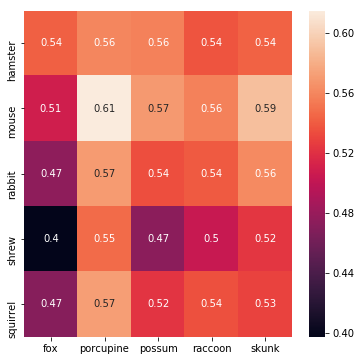

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
data=pd.DataFrame([bag_accuracy[0:5],bag_accuracy[5:10],bag_accuracy[10:15],bag_accuracy[15:20],bag_accuracy[20:]],
                  index = [i for i in small_mammals],
                  columns = [i for i in medium_sized_mammals])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(bag_accuracy).describe()

,0
count,25.000000
mean,0.533633
std,0.044815
min,0.397500
25%,0.522500
50%,0.540000
75%,0.560000
max,0.615000


In [0]:
# best peremeter
bag_accuracy=list()
bag_time=list()
print("Bagging ") 
for i in range(0,25):
  start = time.time()
  bag1 = BaggingClassifier(n_estimators=3, max_samples=0.01, bootstrap=False, bootstrap_features=False)
  bag1.fit(x_train3_[i], y_train_bin3[i])
  bag1_pred=bag1.predict(x_test3_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list[i][0],test_list[i][1] ,bag1.score(x_test3_[i], y_test_bin3[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  bag_accuracy.append(bag1.score(x_test3_[i], y_test_bin3[i]))
  bag_time.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(bag_accuracy)*100))
print("average time: {} seconds".format(np.mean(bag_time)))

Bagging 
Accuracy (hamster, fox): 46.916666666666664%
0.6483886241912842 seconds

Accuracy (hamster, porcupine): 49.416666666666664%
0.6105859279632568 seconds

Accuracy (hamster, possum): 51.66666666666667%
0.5955331325531006 seconds

Accuracy (hamster, raccoon): 55.58333333333333%
0.6022903919219971 seconds

Accuracy (hamster, skunk): 62.083333333333336%
0.6186285018920898 seconds

Accuracy (mouse, fox): 55.41666666666667%
0.6173033714294434 seconds

Accuracy (mouse, porcupine): 51.916666666666664%
0.6103298664093018 seconds

Accuracy (mouse, possum): 53.166666666666664%
0.602393388748169 seconds

Accuracy (mouse, raccoon): 48.5%
0.6084334850311279 seconds

Accuracy (mouse, skunk): 61.33333333333333%
0.6082196235656738 seconds

Accuracy (rabbit, fox): 48.41666666666667%
0.595470666885376 seconds

Accuracy (rabbit, porcupine): 54.166666666666664%
0.5659265518188477 seconds

Accuracy (rabbit, possum): 51.24999999999999%
0.5739266872406006 seconds

Accuracy (rabbit, raccoon): 56.9999999

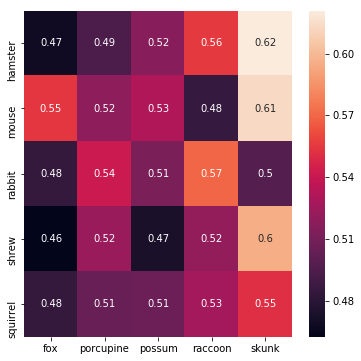

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
data=pd.DataFrame([bag_accuracy[0:5],bag_accuracy[5:10],bag_accuracy[10:15],bag_accuracy[15:20],bag_accuracy[20:]],
                  index = [i for i in small_mammals],
                  columns = [i for i in medium_sized_mammals])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(bag_accuracy).describe()

,0
count,25.000000
mean,0.524600
std,0.042936
min,0.462500
25%,0.494167
50%,0.519167
75%,0.551667
max,0.620833


# **Prediction on two testing subclass images from each of the two superclasses**

## **create pair list**

In [0]:
# slect two from each superclass
def select_two(mammals_list):
  mammals_two=list()
  for i in range(0,5):
    for j in range(i+1,5):
      mammals_two.append([mammals_list[i],mammals_list[j]])
  return mammals_two

In [0]:

small_two=select_two(small_mammals)
medium_two=select_two(medium_sized_mammals)
#len(medium_two)

In [0]:
def train_test_2(small,medium): # test class for small and med
  small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
  small_mammals.remove(small[0])
  small_mammals.remove(small[1])
  medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
  medium_sized_mammals.remove(medium[0])
  medium_sized_mammals.remove(medium[1])
  
  # For training set
  medium_ind = [ fine_label.index(x) for x in medium_sized_mammals ]
  small_ind = [ fine_label.index(x) for x in small_mammals ]
  target_ind = medium_ind + small_ind

  #print ("Training set-\nNew index of Medium-sized mammals:", medium_ind,"\nNew index of Small mammals:", small_ind)

  # For testing data - 
  medium_ind_2 = [ fine_label.index(x) for x in medium ]
  small_ind_2 = [ fine_label.index(x) for x in small ]
  target_ind_2 = medium_ind_2 + small_ind_2
  #print ("\nTesting set-\nNew index of Medium-sized mammals:", medium_ind_2,"\nNew index of Small mammals:", small_ind_2)
  
  # Splice the dataset to extract the relevant portion of data
  train_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind])
  y_train4 = y[train_slice3]
  x_train4 = x[train_slice3]

  # Test set
  test_slice3 = np.array([ idx for idx, y in enumerate(y) if y[0] in target_ind_2])
  y_test4 = y[test_slice3]
  x_test4 = x[test_slice3]

  #print ("Training set:", np.unique(y_train4))
  #print ("\nTesting set:", np.unique(y_test4))
  #  Binary as we are working with two superclasses labels (or coarse labels)
  y_train_bin4 = np.array([[int(y[0] in medium_ind)] for y in y_train4])
  y_test_bin4 = np.array([[int(y[0] in medium_ind_2)] for y in y_test4])
  y_bin4 = np.concatenate((y_train_bin4,y_test_bin4)) # for two superclass
  
  return x_train4,x_test4,y_train_bin4,y_test_bin4

In [0]:
# create list for train and test

x_train4=list()
x_test4=list()
y_train_bin4=list()
y_test_bin4=list()
test_list2=list()  
for i in range(0,10):
  for j in range(0,10):
    small=small_two[i]
    medium=medium_two[j]
    x_train_temp,x_test_temp,y_train_temp,y_test_temp=train_test_2(small,medium)
    x_train4.append(x_train_temp)
    x_test4.append(x_test_temp)
    y_train_bin4.append(y_train_temp)
    y_test_bin4.append(y_test_temp)
    test_list2.append([small,medium])  


In [0]:
len(x_train4)

In [0]:
x_train4_ = [x_train4[i].reshape(x_train4[i].shape[0],3*32*32) for i in range(0,100)]
x_test4_ = [x_test4[i].reshape(x_test4[i].shape[0],3*32*32) for i in range(0,100)]
len(x_train4_)

## **KNN**

In [0]:
# default
# select ['hamster', 'mouse'], ['fox', 'porcupine']
start = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train4_[0], y_train_bin4[0])
knn_pred=knn.predict(x_test4_[0])
print ("Accuracy ({}, {}): {}%".format(test_list2[0][0],test_list2[0][1] ,knn.score(x_test4_[0], y_test_bin4[0])*100)) 
end = time.time()
print('{} seconds'.format(end-start))

Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 52.0%
117.41185069084167 seconds


In [0]:
indices = [np.random.choice(range(len(x_test4_[0]))) for i in range(36)]

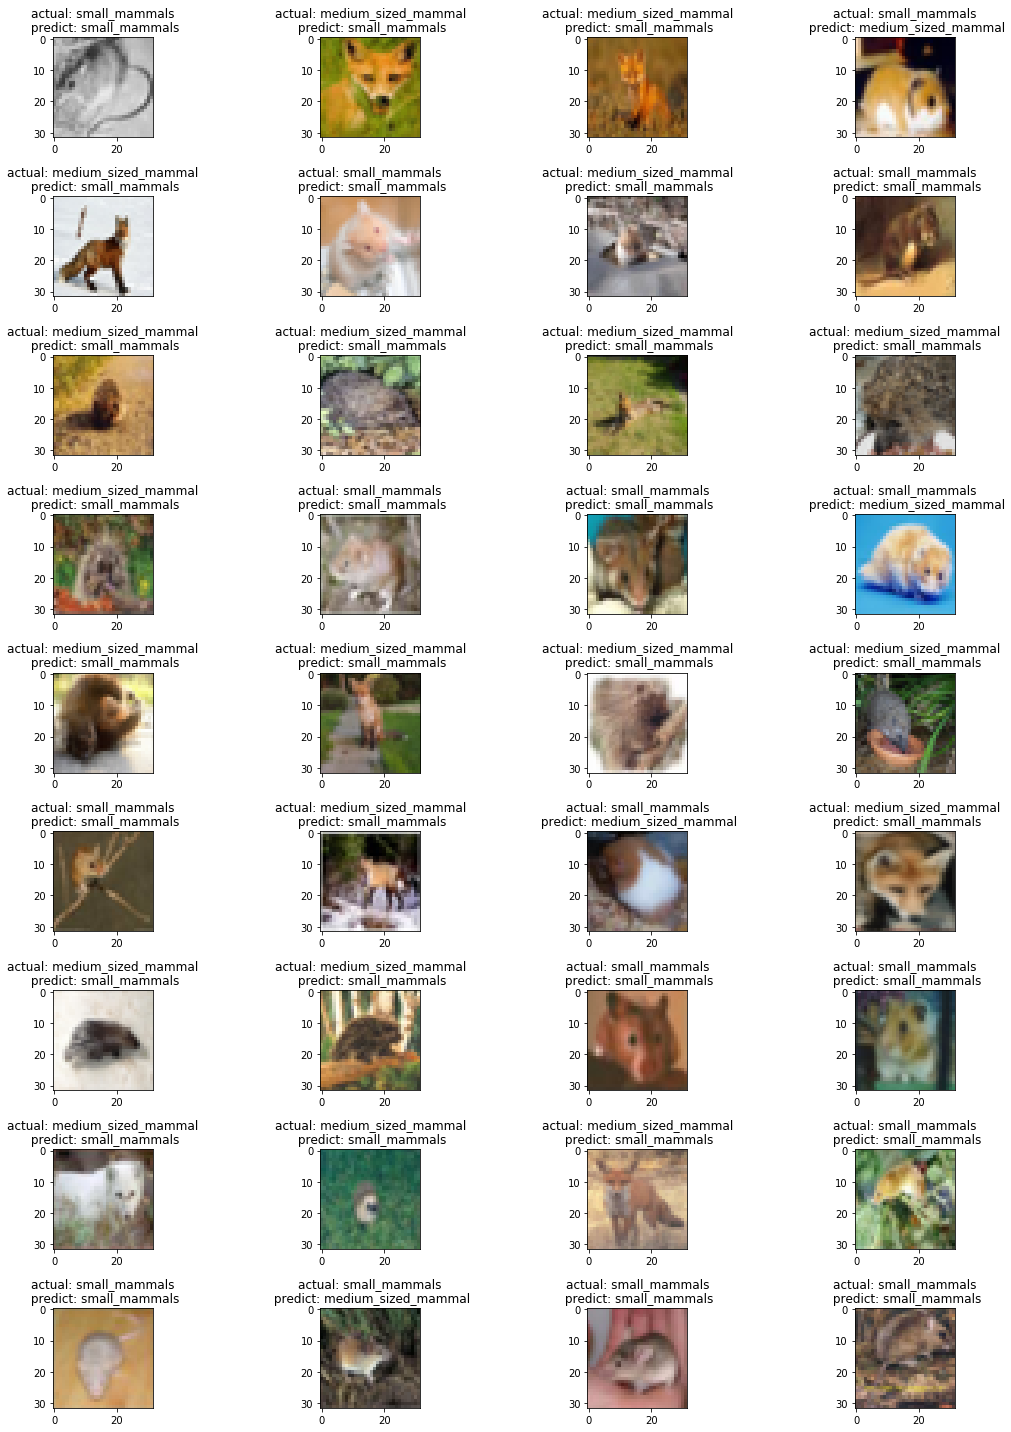

In [0]:
cifar_grid2(x_test4_[0],y_test_bin4[0],indices,4,knn_pred)

In [0]:
# best parameter
start = time.time()
knn = KNeighborsClassifier(n_neighbors=100,weights='distance')
knn.fit(x_remaining_mammals, y_remaining_mammals_bin)
knn_pred=knn.predict(x_rest_mammals)
#scores = cross_val_score(knn, x_remaining_mammals,y_remaining_mammals_bin, cv=5)
#print(scores)
#scores = cross_val_score(knn, x_rest_mammals,y_rest_mammals_bin, cv=5)
#print(scores)
print ("KNN Accuracy: {}%".format(knn.score(x_remaining_mammals, y_remaining_mammals_bin)*100))
print ("KNN Accuracy: {}%".format(knn.score(x_rest_mammals, y_rest_mammals_bin)*100))
end = time.time()
print(end - start)

KNN Accuracy: 100.0%
KNN Accuracy: 54.166666666666664%
220.13702368736267


In [0]:
indices = [np.random.choice(range(len(x_rest_mammals))) for i in range(36)]

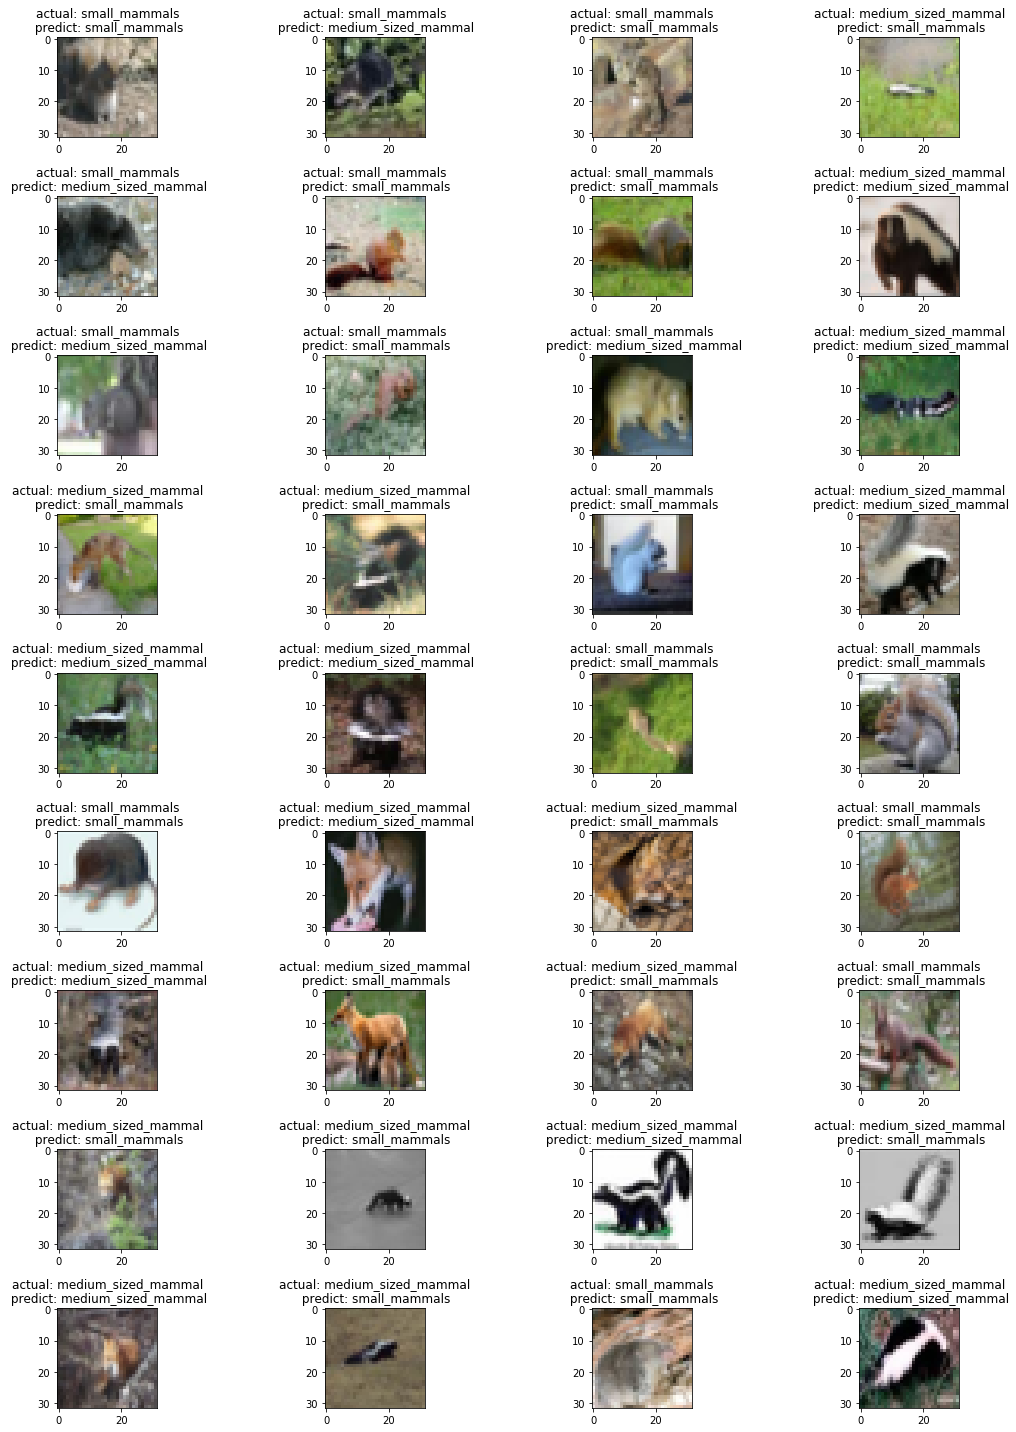

In [0]:
cifar_grid2(x_rest_mammals,y_rest_mammals_bin,indices,4,knn_pred)

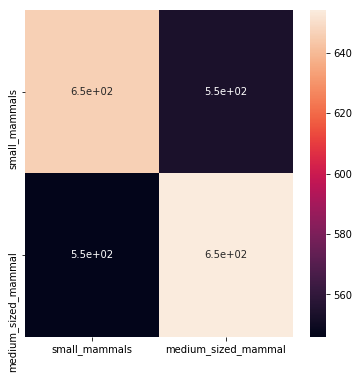

In [0]:
cm=confusion_matrix(y_rest_mammals_bin, knn_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_rest_mammals_bin, knn_pred,target_names=['small_mammals','medium_sized_mammal']))

                     precision    recall  f1-score   support

      small_mammals       0.54      0.54      0.54      1200
medium_sized_mammal       0.54      0.55      0.54      1200

          micro avg       0.54      0.54      0.54      2400
          macro avg       0.54      0.54      0.54      2400
       weighted avg       0.54      0.54      0.54      2400



In [0]:
# best peremeter 100
knn_accuracy2=list()
knn_time2=list()
print("KNN ") 
for i in range(0,100):
  start = time.time()
  knn1 = KNeighborsClassifier(n_neighbors=100, weights='distance')
  knn1.fit(x_train4_[i], y_train_bin4[i])
  #knn1_pred=knn1.predict(x_test4_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list2[i][0],test_list2[i][1] ,knn1.score(x_test4_[i], y_test_bin4[i])*100)) 
  end = time.time()
  print('{} seconds'.format(end - start))
  knn_accuracy2.append(knn1.score(x_test4_[i], y_test_bin4[i]))
  knn_time2.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(knn_accuracy2)*100))
print("average time: {} seconds".format(np.mean(knn_time2)))

KNN 
Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 52.125%
53.68342614173889 seconds
Accuracy (['hamster', 'mouse'], ['fox', 'possum']): 55.708333333333336%
53.76803135871887 seconds
Accuracy (['hamster', 'mouse'], ['fox', 'raccoon']): 52.83333333333333%
53.62080669403076 seconds
Accuracy (['hamster', 'mouse'], ['fox', 'skunk']): 52.33333333333333%
53.68988370895386 seconds
Accuracy (['hamster', 'mouse'], ['porcupine', 'possum']): 54.29166666666667%
53.824082374572754 seconds
Accuracy (['hamster', 'mouse'], ['porcupine', 'raccoon']): 50.541666666666664%
53.64753437042236 seconds
Accuracy (['hamster', 'mouse'], ['porcupine', 'skunk']): 51.583333333333336%
53.781091928482056 seconds
Accuracy (['hamster', 'mouse'], ['possum', 'raccoon']): 55.166666666666664%
54.30186581611633 seconds
Accuracy (['hamster', 'mouse'], ['possum', 'skunk']): 54.95833333333333%
53.812493085861206 seconds
Accuracy (['hamster', 'mouse'], ['raccoon', 'skunk']): 50.583333333333336%
53.99618220329285 second

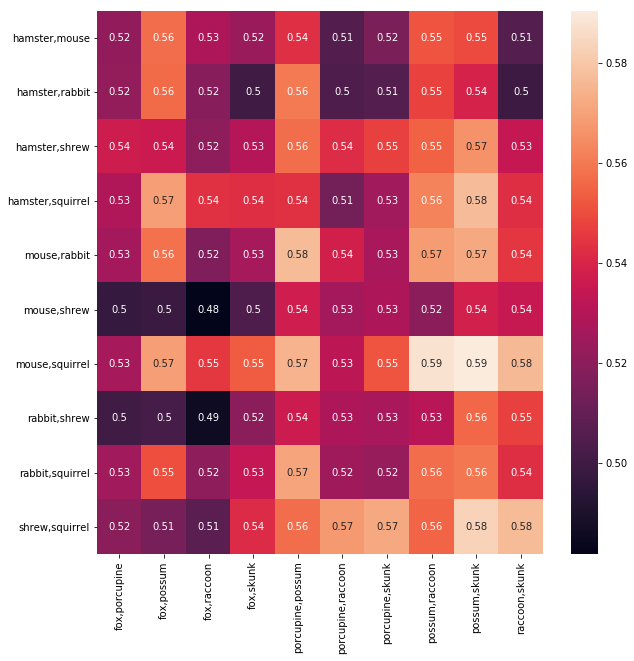

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (10,10))
data=pd.DataFrame([knn_accuracy2[0:10],knn_accuracy2[10:20],knn_accuracy2[20:30],knn_accuracy2[30:40],knn_accuracy2[40:50],knn_accuracy2[50:60],knn_accuracy2[60:70],knn_accuracy2[70:80],knn_accuracy2[80:90],knn_accuracy2[90:100]],
                  index = [small_two[i][0]+','+small_two[i][1] for i in range(0,10)],
                  columns = [medium_two[i][0]+','+medium_two[i][1] for i in range(0,10)])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(knn_accuracy2,columns=['KNN 2 pair missing']).describe()

,KNN 2 pair missing
count,100.000000
mean,0.537883
std,0.023932
min,0.481667
25%,0.521562
50%,0.536875
75%,0.556042
max,0.590417


## **Bagging**

In [0]:
# default 
# ['hamster', 'mouse'], ['fox', 'porcupine']
start = time.time()
bag = BaggingClassifier()
bag.fit(x_train4_[0], y_train_bin4[0])
bag_pred=bag.predict(x_test4_[0])
print ("Accuracy ({}, {}): {}%".format(test_list2[0][0],test_list2[0][1] ,bag.score(x_test4_[0], y_test_bin4[0])*100)) 
end = time.time()
print('{} seconds'.format(end-start))

Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 56.875%


In [0]:
indices = [np.random.choice(range(len(x_test4_[0]))) for i in range(36)]

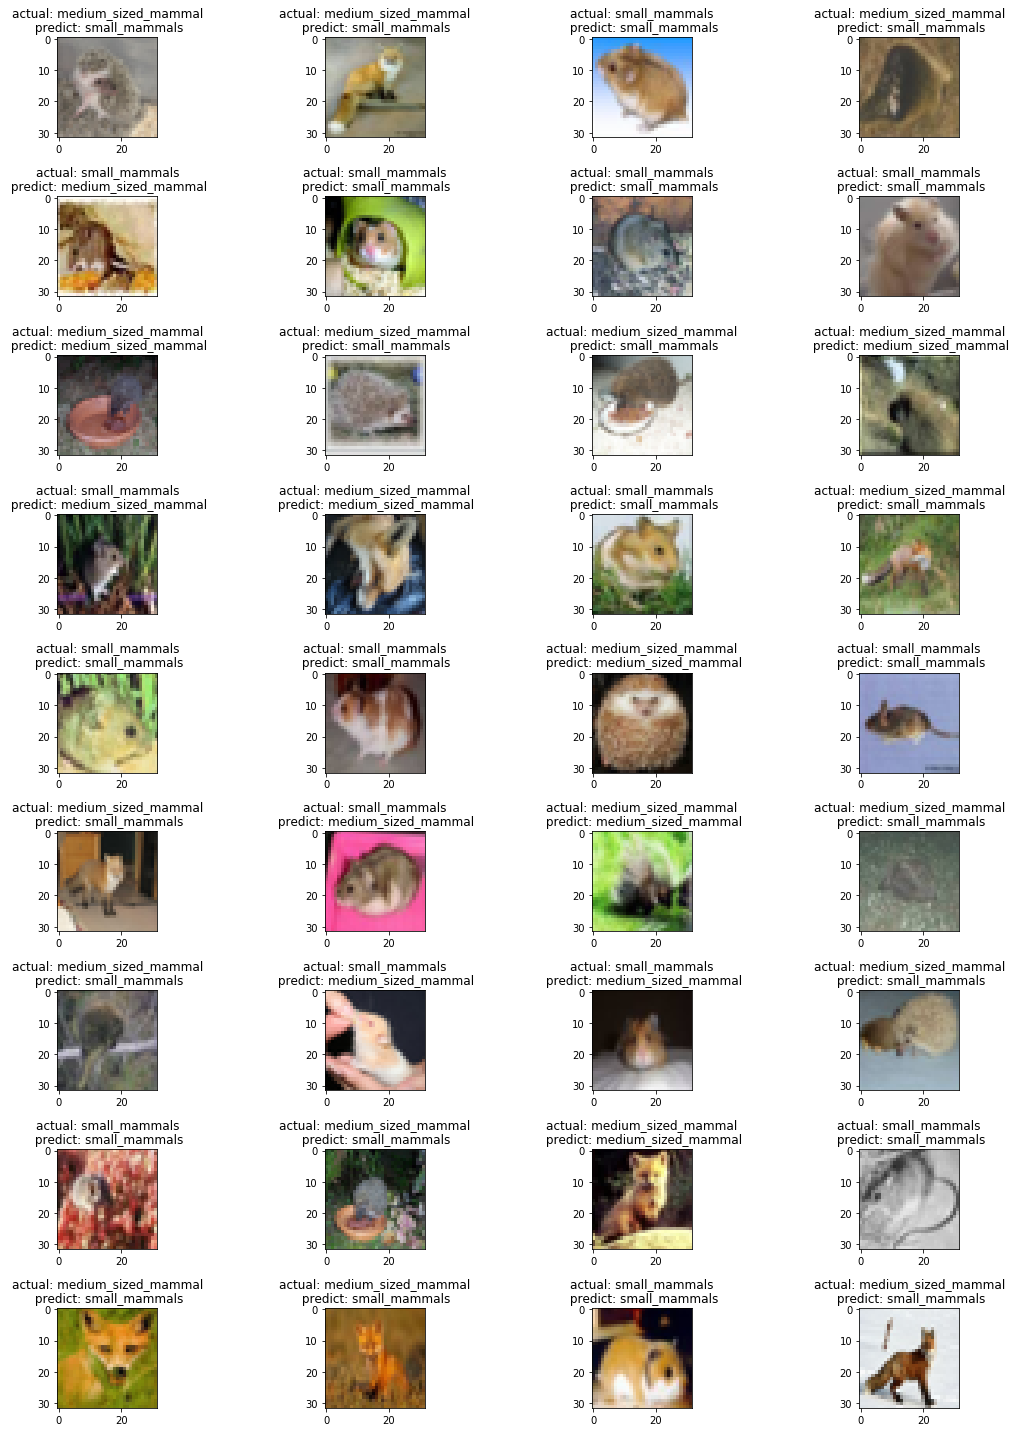

In [0]:
cifar_grid2(x_test4_[0],y_test_bin4[0],indices,4,bag_pred)

In [0]:
# best parameter
start = time.time()
bag = BaggingClassifier(n_estimators = 3, max_samples = 0.01, bootstrap = True, bootstrap_features = False)
bag.fit(x_remaining_mammals, y_remaining_mammals_bin)
bag_pred=bag.predict(x_rest_mammals)
scores = cross_val_score(bag, x_remaining_mammals,y_remaining_mammals, cv=5)
print(scores)
scores = cross_val_score(bag, x_rest_mammals,y_rest_mammals_bin, cv=5)
print(scores)
print ("Bagging Accuracy: {}%".format(bag.score(x_remaining_mammals, y_remaining_mammals_bin)*100))
print ("Bagging Accuracy: {}%".format(bag.score(x_rest_mammals, y_rest_mammals_bin)*100))
end = time.time()
print(end - start)

[0.33541667 0.35416667 0.35625    0.35416667 0.26666667]
[0.53194444 0.53055556 0.52222222 0.525      0.54583333]
Bagging Accuracy: 62.0%
Bagging Accuracy: 52.0%
3.4020745754241943


In [0]:
indices = [np.random.choice(range(len(x_rest_mammals))) for i in range(36)]

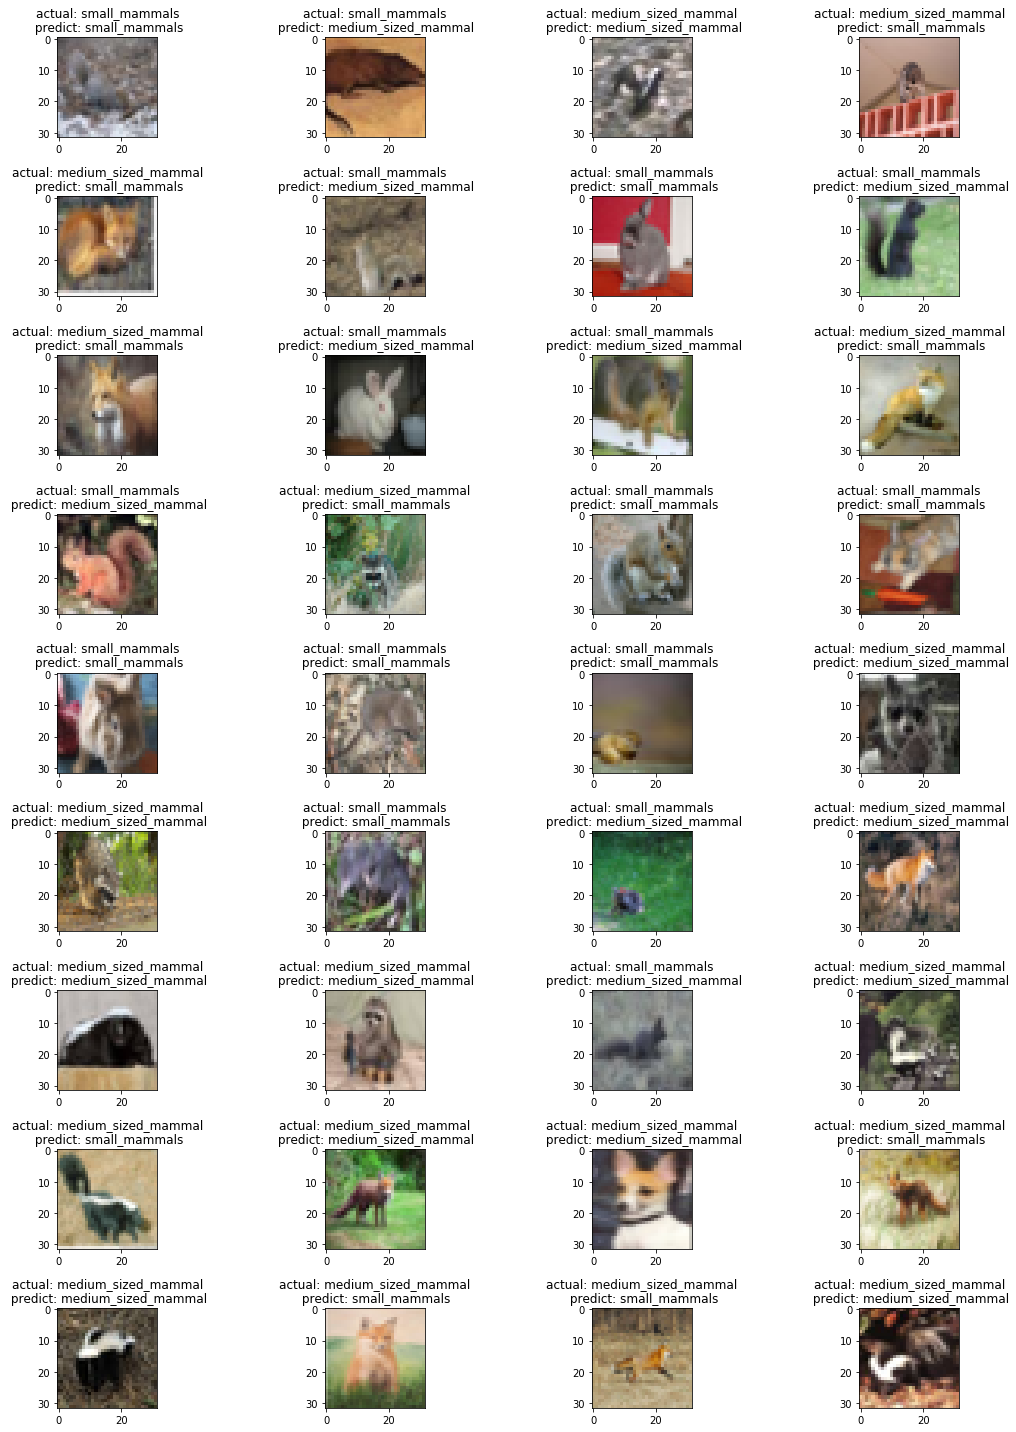

In [0]:
cifar_grid2(x_rest_mammals,y_rest_mammals_bin,indices,4,bag_pred)

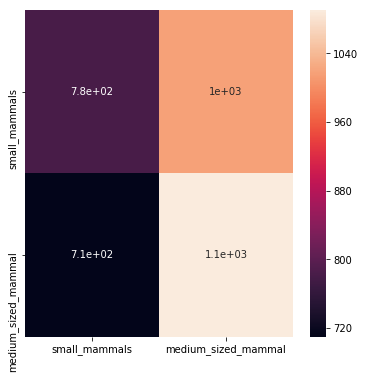

In [0]:
cm=confusion_matrix(y_rest_mammals_bin, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_rest_mammals_bin, bag_pred,target_names=['small_mammals','medium_sized_mammal']))

                     precision    recall  f1-score   support

      small_mammals       0.52      0.43      0.48      1800
medium_sized_mammal       0.52      0.61      0.56      1800

          micro avg       0.52      0.52      0.52      3600
          macro avg       0.52      0.52      0.52      3600
       weighted avg       0.52      0.52      0.52      3600



In [0]:
# best parater 100
bag_accuracy3=list()
bag_time3=list()
print("bagging") 
for i in range(0,100):
  start = time.time()
  bag1 = BaggingClassifier(n_estimators = 3, max_samples = 0.01, bootstrap = False, bootstrap_features = False)
  bag1.fit(x_train4_[i], y_train_bin4[i])
  bag1_pred=bag1.predict(x_test4_[i])
  print ("Accuracy ({}, {}): {}%".format(test_list2[i][0],test_list2[i][1] ,bag1.score(x_test4_[i], y_test_bin4[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  bag_accuracy3.append(bag1.score(x_test4_[i], y_test_bin4[i]))
  bag_time3.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(bag_accuracy3)*100))
print("average time: {} seconds".format(np.mean(bag_time3)))

bagging
Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 50.041666666666664%
0.8124897480010986 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'possum']): 54.666666666666664%
0.7724988460540771 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'raccoon']): 58.70833333333333%
0.7522428035736084 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'skunk']): 50.583333333333336%
0.7620813846588135 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'possum']): 52.916666666666664%
0.7527353763580322 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'raccoon']): 55.708333333333336%
0.753077507019043 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'skunk']): 51.95833333333333%
0.7701106071472168 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'raccoon']): 59.25%
0.7627575397491455 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'skunk']): 43.0%
0.7549953460693359 seconds

Accuracy (['hamster', 'mouse'], ['raccoon', 'skunk']): 55.41666666666667%
0.77142333984375 seco

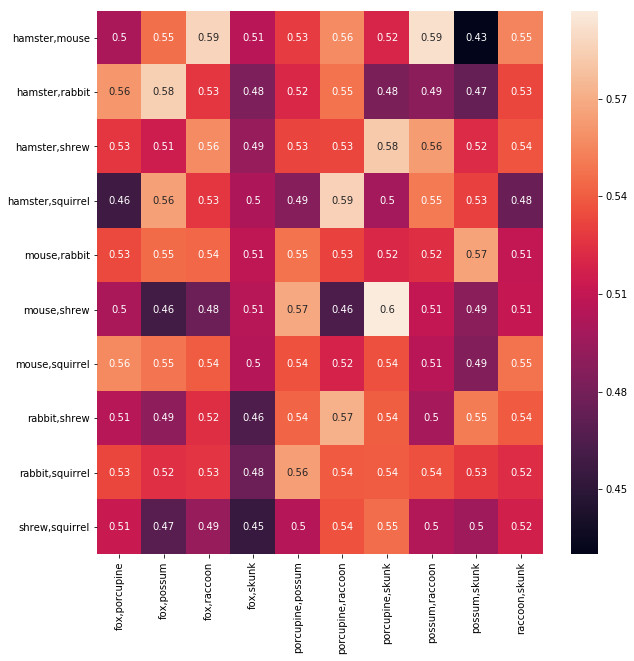

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (10,10))
data=pd.DataFrame([bag_accuracy3[0:10],bag_accuracy3[10:20],bag_accuracy3[20:30],bag_accuracy3[30:40],bag_accuracy3[40:50],bag_accuracy3[50:60],bag_accuracy3[60:70],bag_accuracy3[70:80],bag_accuracy3[80:90],bag_accuracy3[90:100]],
                  index = [small_two[i][0]+','+small_two[i][1] for i in range(0,10)],
                  columns = [medium_two[i][0]+','+medium_two[i][1] for i in range(0,10)])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(bag_accuracy3,columns=['Bagging missing 2 pairs']).describe()

,Bagging missing 2 pairs
count,100.000000
mean,0.523008
std,0.033473
min,0.430000
25%,0.501354
50%,0.526458
75%,0.545208
max,0.597083


# **3 subclasses from each superclass as testing data**

## **create data list**

In [0]:
# create list for train and test
# train,test=test,train
x_train5=list()
x_test5=list()
y_train_bin5=list()
y_test_bin5=list()
train_list=list()  
for i in range(0,10):
  for j in range(0,10):
    small=small_two[i]
    medium=medium_two[j]
    x_test_temp,x_train_temp,y_test_temp,y_train_temp=train_test_2(small,medium)
    x_train5.append(x_train_temp)
    x_test5.append(x_test_temp)
    y_train_bin5.append(y_train_temp)
    y_test_bin5.append(y_test_temp)
    train_list.append([small,medium])  


In [41]:
x_train5_ = [x_train5[i].reshape(x_train5[i].shape[0],3*32*32) for i in range(0,100)]
x_test5_ = [x_test5[i].reshape(x_test5[i].shape[0],3*32*32) for i in range(0,100)]
len(x_train5_)

100

## **KNN**

In [42]:
# default
# select ['hamster', 'mouse'], ['fox', 'porcupine'] as train
start = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train5_[0], y_train_bin5[0])
knn_pred=knn.predict(x_test5_[0])
print ("Accuracy: {}%".format(knn.score(x_test5_[0], y_test_bin5[0])*100)) 
end = time.time()

Accuracy: 55.666666666666664%


In [0]:
indices = [np.random.choice(range(len(x_test5_[0]))) for i in range(36)]

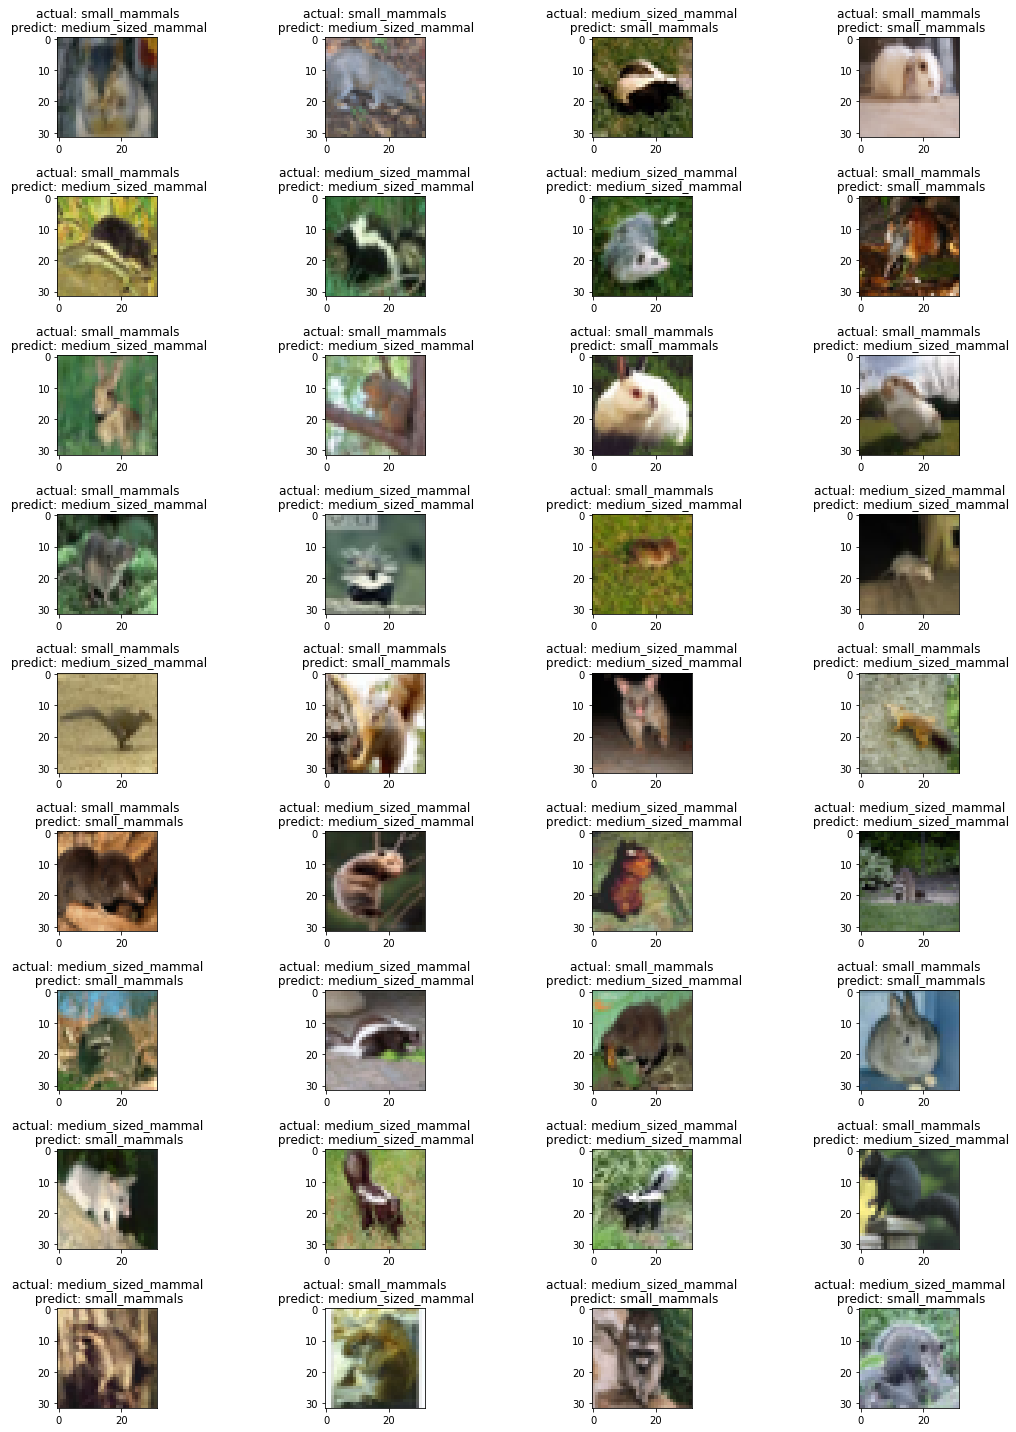

In [44]:
cifar_grid2(x_test5_[0],y_test_bin5[0],indices,4,knn_pred)

In [0]:
knn_accuracy3=list()
knn_time3=list()
print("KNN ") 
for i in range(0,100):
  start = time.time()
  knn1 = KNeighborsClassifier(n_neighbors=6, weights='distance')
  knn1.fit(x_train5_[i], y_train_bin5[i])
  #knn1_pred=knn1.predict(x_test5_[i])
  print ("Accuracy ({}, {}): {}%".format(train_list[i][0],train_list[i][1] ,knn1.score(x_test5_[i], y_test_bin5[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  knn_accuracy3.append(knn1.score(x_test5_[i], y_test_bin5[i]))
  knn_time3.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(knn_accuracy3)*100))
print("average time: {} seconds".format(np.mean(knn_time3)))

KNN 
Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 55.19444444444444%
67.9418613910675 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'possum']): 54.44444444444444%
67.55032849311829 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'raccoon']): 54.13888888888889%
68.25186467170715 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'skunk']): 52.11111111111111%
66.21036076545715 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'possum']): 53.75%
66.2989912033081 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'raccoon']): 52.72222222222223%
66.31367254257202 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'skunk']): 52.361111111111114%
66.77315402030945 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'raccoon']): 52.361111111111114%
67.31018710136414 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'skunk']): 51.30555555555556%
66.90391445159912 seconds

Accuracy (['hamster', 'mouse'], ['raccoon', 'skunk']): 51.30555555555556%
67.24317526817322 second

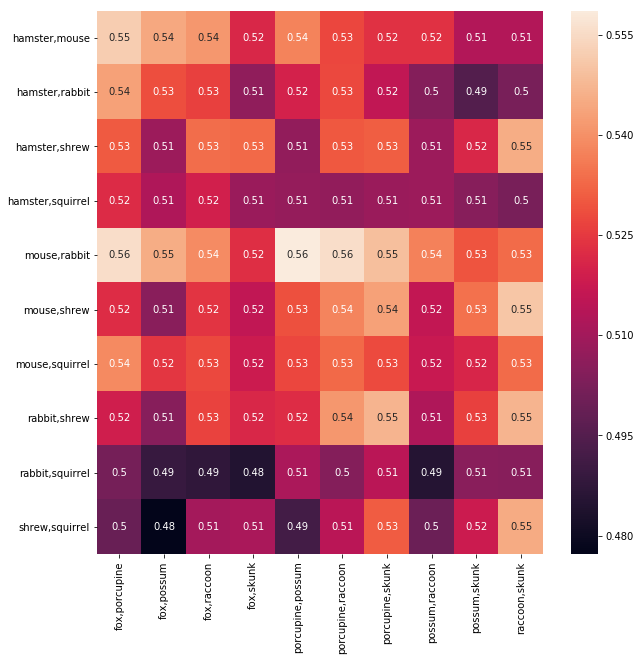

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
# label: train data
plt.figure(figsize = (10,10))
data=pd.DataFrame([knn_accuracy3[0:10],knn_accuracy3[10:20],knn_accuracy3[20:30],knn_accuracy3[30:40],knn_accuracy3[40:50],knn_accuracy3[50:60],knn_accuracy3[60:70],knn_accuracy3[70:80],knn_accuracy3[80:90],knn_accuracy3[90:100]],
                  index = [small_two[i][0]+','+small_two[i][1] for i in range(0,10)],
                  columns = [medium_two[i][0]+','+medium_two[i][1] for i in range(0,10)])


ax=sns.heatmap(data, annot=True)


In [0]:
pd.DataFrame(knn_accuracy3).describe()

,0
count,100.000000
mean,0.521469
std,0.017263
min,0.477222
25%,0.508819
50%,0.521667
75%,0.533125
max,0.558611


## **Bagging**

In [0]:
# default
# select ['hamster', 'mouse'], ['fox', 'porcupine'] as train
start = time.time()
bag = BaggingClassifier()
bag.fit(x_train5_[0], y_train_bin5[0])
bag_pred=bag.predict(x_test5_[0])
print ("Accuracy: {}%".format(bag.score(x_test5_[0], y_test_bin5[0])*100)) 
end = time.time()

Accuracy: 49.861111111111114%


In [0]:
indices = [np.random.choice(range(len(x_test5_[0]))) for i in range(36)]

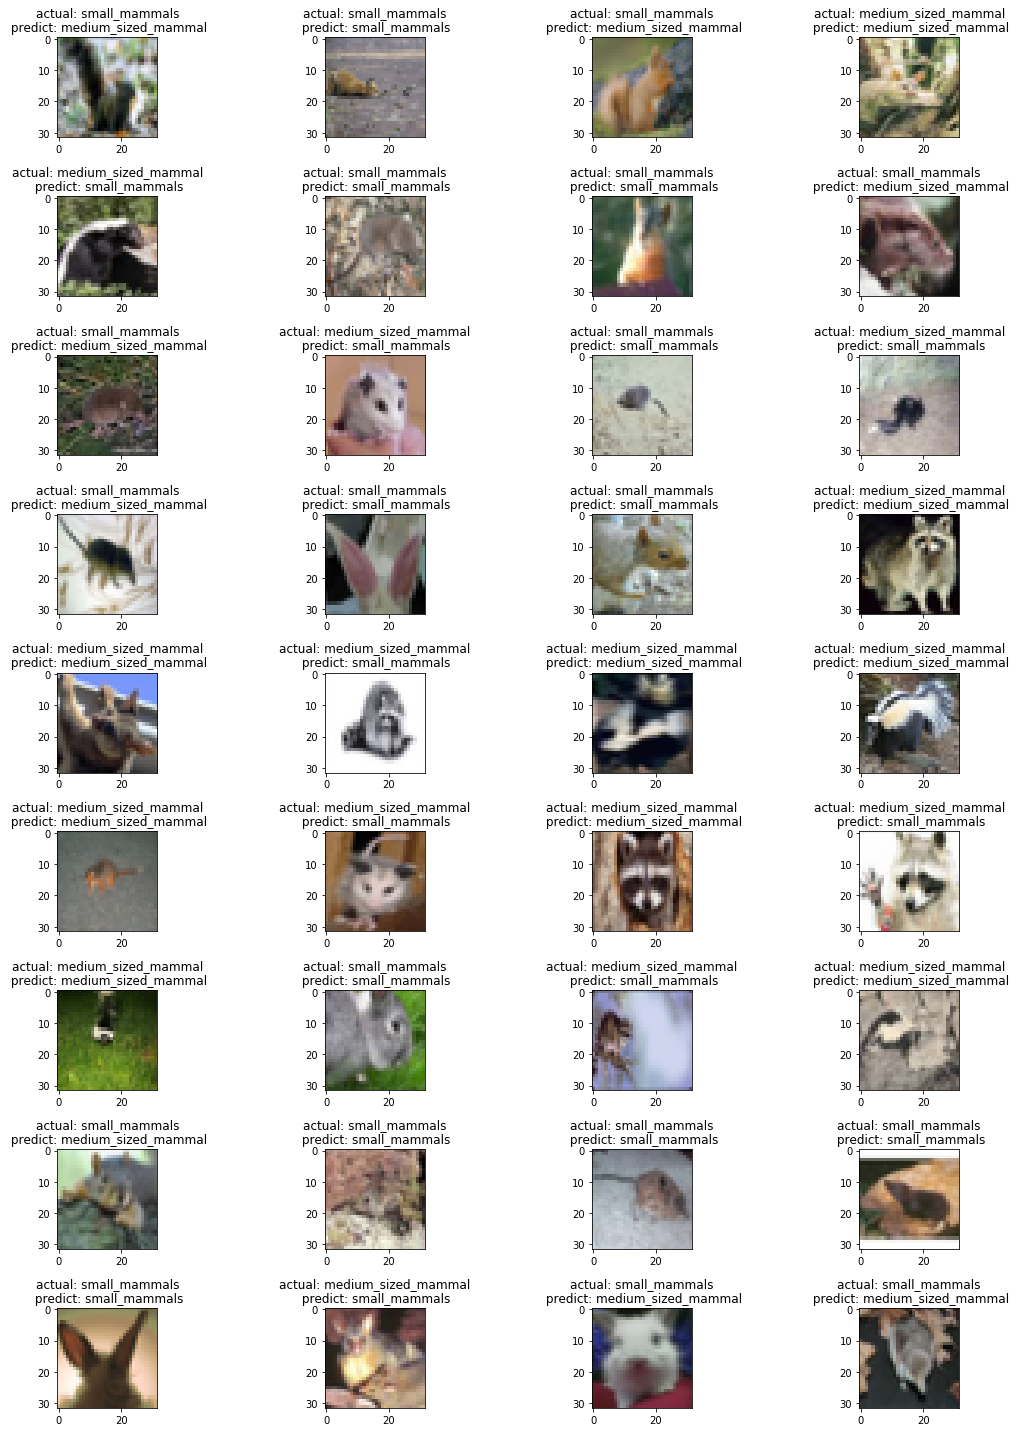

In [0]:
cifar_grid2(x_test5_[0],y_test_bin5[0],indices,4,bag_pred)

In [0]:
# find the baseline performance for the bagging
start = time.time()
bag = BaggingClassifier(n_estimators = 3, max_samples = 0.01, bootstrap = True, bootstrap_features = False)
bag.fit(x_remaining_mammals, y_remaining_mammals_bin)
bag_pred=bag.predict(x_rest_mammals)
scores = cross_val_score(bag, x_remaining_mammals,y_remaining_mammals, cv=5)
print(scores)
scores = cross_val_score(bag, x_rest_mammals,y_rest_mammals_bin, cv=5)
print(scores)
print ("Bagging Accuracy: {}%".format(bag.score(x_remaining_mammals, y_remaining_mammals_bin)*100))
print ("Bagging Accuracy: {}%".format(bag.score(x_rest_mammals, y_rest_mammals_bin)*100))
end = time.time()
print(end - start)

[0.33541667 0.35416667 0.35625    0.35416667 0.26666667]
[0.53194444 0.53055556 0.52222222 0.525      0.54583333]
Bagging Accuracy: 62.0%
Bagging Accuracy: 52.0%
3.4020745754241943


In [0]:
indices = [np.random.choice(range(len(x_rest_mammals))) for i in range(36)]

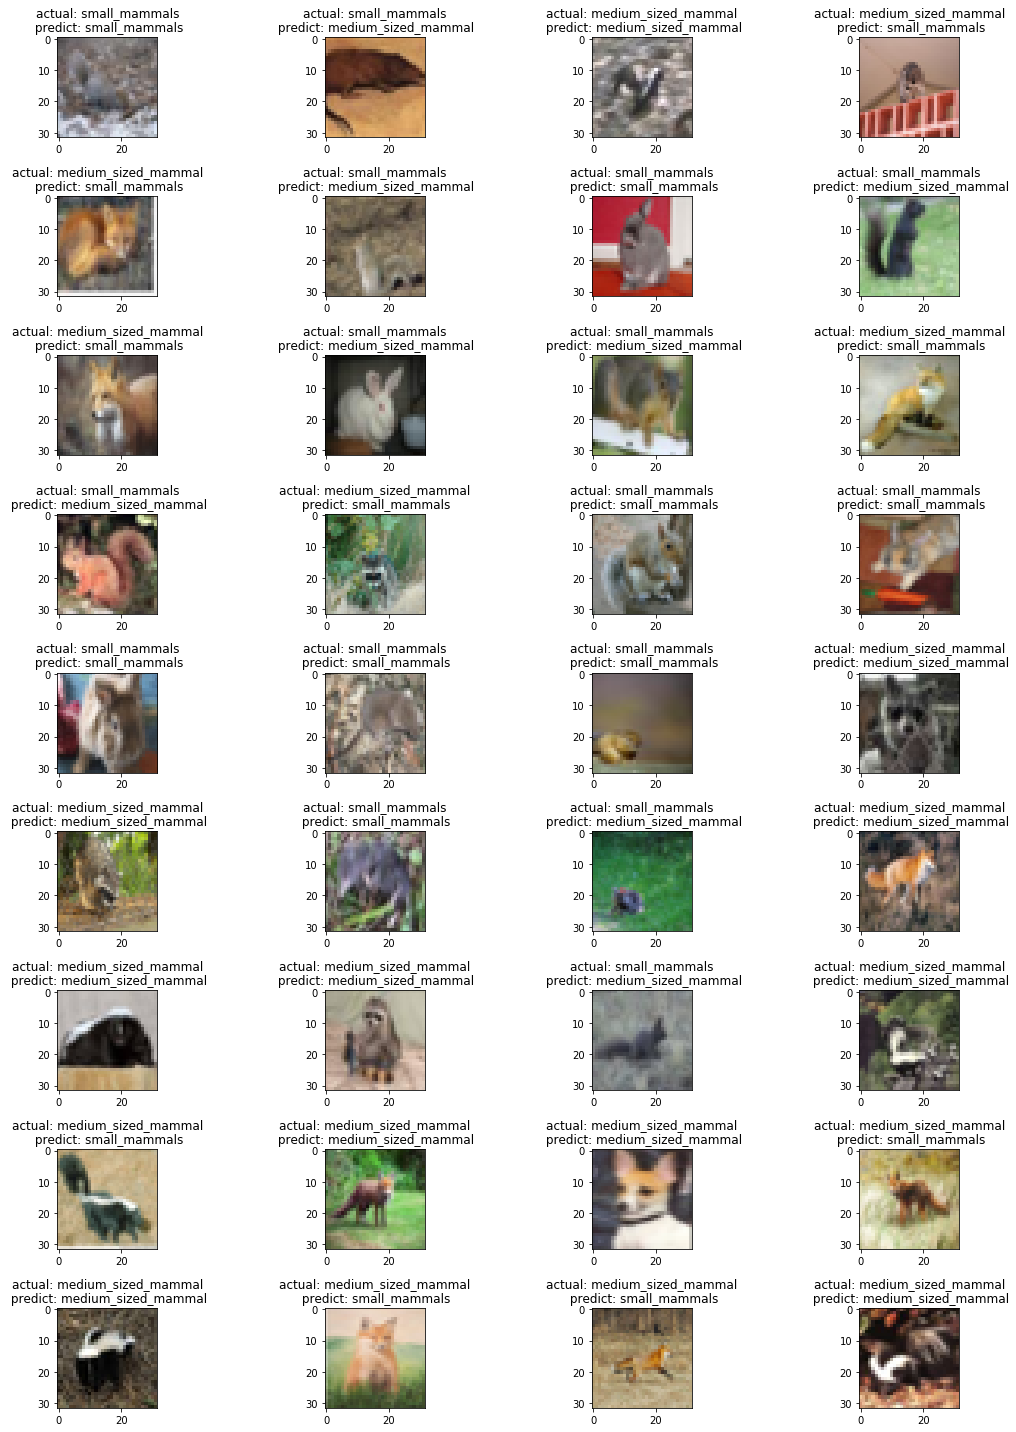

In [0]:
cifar_grid2(x_rest_mammals,y_rest_mammals_bin,indices,4,bag_pred)

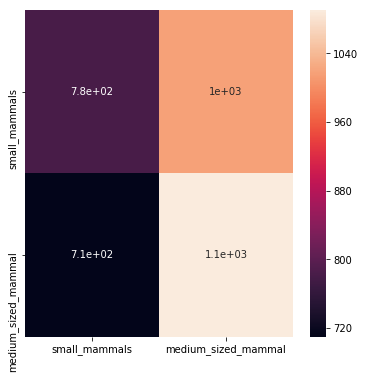

In [0]:
cm=confusion_matrix(y_rest_mammals_bin, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (6,6))
df_cm = pd.DataFrame(cm, index = [i for i in ['small_mammals','medium_sized_mammal']],
                  columns = [i for i in ['small_mammals','medium_sized_mammal']])

ax=sns.heatmap(df_cm, annot=True)

In [0]:
print(classification_report(y_rest_mammals_bin, bag_pred,target_names=['small_mammals','medium_sized_mammal']))

                     precision    recall  f1-score   support

      small_mammals       0.52      0.43      0.48      1800
medium_sized_mammal       0.52      0.61      0.56      1800

          micro avg       0.52      0.52      0.52      3600
          macro avg       0.52      0.52      0.52      3600
       weighted avg       0.52      0.52      0.52      3600



In [0]:
bag_accuracy3=list()
bag_time3=list()
print("bagging") 
for i in range(0,100):
  start = time.time()
  bag1 = BaggingClassifier(n_estimators = 3, max_samples = 0.01, bootstrap = True, bootstrap_features = False)
  bag1.fit(x_train5_[i], y_train_bin5[i])
  bag1_pred=bag1.predict(x_test5_[i])
  print ("Accuracy ({}, {}): {}%".format(train_list[i][0],train_list[i][1] ,bag1.score(x_test5_[i], y_test_bin5[i])*100)) 
  end = time.time()
  print('{} seconds\n'.format(end - start))
  bag_accuracy3.append(bag1.score(x_test5_[i], y_test_bin5[i]))
  bag_time3.append(end-start)
  # choose 36 img randomly
  #indices = [np.random.choice(range(len(x_test3_[i]))) for j in range(36)]
  #cifar_grid1(x_test3_[i], y_test_bin3[i], indices,4,lr_pred)
print("average accuracy: {}%".format(np.mean(bag_accuracy3)*100))
print("average time: {} seconds".format(np.mean(bag_time3)))

bagging
Accuracy (['hamster', 'mouse'], ['fox', 'porcupine']): 53.05555555555556%
0.9114084243774414 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'possum']): 53.52777777777777%
0.8942050933837891 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'raccoon']): 53.05555555555556%
0.8976011276245117 seconds

Accuracy (['hamster', 'mouse'], ['fox', 'skunk']): 54.58333333333333%
0.8882052898406982 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'possum']): 49.72222222222222%
0.8954215049743652 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'raccoon']): 50.55555555555556%
0.9146230220794678 seconds

Accuracy (['hamster', 'mouse'], ['porcupine', 'skunk']): 47.94444444444444%
0.8914644718170166 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'raccoon']): 51.388888888888886%
0.8810286521911621 seconds

Accuracy (['hamster', 'mouse'], ['possum', 'skunk']): 51.52777777777777%
0.8861021995544434 seconds

Accuracy (['hamster', 'mouse'], ['raccoon', 'skunk']): 48.61111111111111%

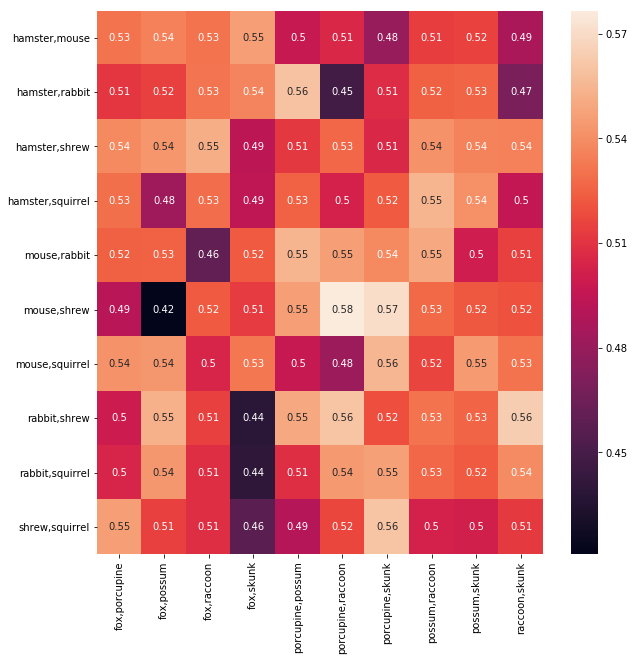

In [0]:
#cm=confusion_matrix(y_test_bin_1, bag_pred, labels=[0,1], sample_weight=None)
plt.figure(figsize = (10,10))
data=pd.DataFrame([bag_accuracy3[0:10],bag_accuracy3[10:20],bag_accuracy3[20:30],bag_accuracy3[30:40],bag_accuracy3[40:50],bag_accuracy3[50:60],bag_accuracy3[60:70],bag_accuracy3[70:80],bag_accuracy3[80:90],bag_accuracy3[90:100]],
                  index = [small_two[i][0]+','+small_two[i][1] for i in range(0,10)],
                  columns = [medium_two[i][0]+','+medium_two[i][1] for i in range(0,10)])


ax=sns.heatmap(data, annot=True)

In [0]:
pd.DataFrame(bag_accuracy3, columns=['Bagging missing 3 pairs']).describe()

,Bagging missing 3 pairs
count,100.000000
mean,0.519750
std,0.028999
min,0.420833
25%,0.505347
50%,0.523611
75%,0.541181
max,0.576667
